<a href="https://colab.research.google.com/github/maciusman/seo-embeddings-operations/blob/main/SEO_3_0_wykorzystanie_embedding%C3%B3w_i_semantyki_w_pracy_nad_SEO_SiteFocus_Radius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---


| | |
|---|---|
| **Autor notatnika** | Damian Sałkowski |
| **Wersja** | 1.0 |
| **Wydawca** | [sensai.academy](https://sensai.academy/) |
| **Lekcja** | Komunikacja z API Modeli Językowych |
| **Tydzień programu** | 4 |
| **Pytania? Napisz na discord. 📩 ** | **damian_17365** |


---


# [Ćwiczenie] Różne metody wykorzystania embeddingów i semantyki w pracy nad SEO


W tym notatniku zrobimy różne ćwiczenia z zakresu wykorzystania embeddingów. Pozwoli Ci on podsumować dotychczas zdobytą wiedzę. Wprowadzimy też kilka nowych koncepcji, które warto znać.

## Konfiguracja Środowiska: Instalacja `crawl4ai`

Zanim zagłębimy się w analizę semantyczną i embeddingi, musimy upewnić się, że nasze środowisko jest odpowiednio przygotowane. W dalszej części kursu będziemy często potrzebować danych z internetu, a ich pozyskiwanie wymaga solidnego narzędzia do crawlera. W tym ćwiczeniu wykorzystamy bibliotekę `crawl4ai`, która jest potężnym narzędziem do pozyskiwania danych z sieci, idealnym do celów SEO.

**`crawl4ai`** to async/await crawler, który pozwala na efektywne i szybkie zbieranie informacji ze stron internetowych. Będzie nam służył do pobierania treści stron, które następnie będziemy analizować pod kątem semantycznym.

W poniższej komórce wykonamy następujące kroki:
1.  **Instalacja `crawl4ai`**: Pobierzemy i zainstalujemy najnowszą wersję biblioteki.
2.  **Instalacja `nest_asyncio`**: To dodatkowa biblioteka, często wymagana w środowiskach takich jak Google Colab, aby umożliwić prawidłowe działanie kodu asynchronicznego (na którym bazuje `crawl4ai`).
3.  **Sprawdzenie wersji `crawl4ai`**: Upewnimy się, że instalacja przebiegła pomyślnie i znamy wersję używanego narzędzia.
4.  **Uruchomienie `crawl4ai-setup`**: To narzędzie konfiguracyjne `crawl4ai`, które może przygotować niezbędne pliki lub katalogi.
5.  **Uruchomienie `crawl4ai-doctor`**: To diagnostyka, która sprawdzi, czy wszystko jest poprawnie skonfigurowane i czy nie ma żadnych problemów z zależnościami.

**Instrukcja:** Uruchom tę komórkę. Zauważysz, że używamy polecenia `%%capture` na początku niektórych sekcji, co oznacza, że wyjście z tych komend (np. z instalacji `pip`) zostanie stłumione, aby nie zaśmiecać widoku, ale procesy będą wykonywane w tle. Sprawdzenie wersji `crawl4ai` będzie widoczne.

In [ ]:
#@title Instalacja środowiska dla crawlera { display-mode: "form" }
#@markdown Ten skrypt instaluje wszystkie niezbędne komponenty do działania crawlera w Google Colab.

import subprocess
import sys
import os

def install_requirements():
    """
    Instaluje wszystkie wymagane pakiety i konfiguruje środowisko.
    """
    print("🔧 Rozpoczynam instalację i konfigurację środowiska...")

    # Lista pakietów do instalacji
    packages = [
        "crawl4ai",
        "nest_asyncio",
        "playwright",
        "pandas",
        "tqdm"
    ]

    # Instalacja pakietów Python
    for package in packages:
        print(f"📦 Instalowanie {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-U", package])

    # Instalacja przeglądarek Playwright
    print("🌐 Instalowanie przeglądarek Playwright...")
    subprocess.check_call([sys.executable, "-m", "playwright", "install", "chromium"])
    subprocess.check_call([sys.executable, "-m", "playwright", "install-deps"])

    # Konfiguracja crawl4ai
    print("⚙️ Konfiguracja crawl4ai...")
    try:
        # Uruchamiamy komendy crawl4ai bezpośrednio
        subprocess.check_call(["crawl4ai-setup"])
        subprocess.check_call(["crawl4ai-doctor"])
    except FileNotFoundError:
        # Jeśli komendy nie są dostępne bezpośrednio, próbujemy przez pip
        print("⚠️ Próba alternatywnej konfiguracji crawl4ai...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "crawl4ai"])
        # Sprawdzamy, czy komendy są teraz dostępne
        if os.system("which crawl4ai-setup") == 0:
            subprocess.check_call(["crawl4ai-setup"])
        if os.system("which crawl4ai-doctor") == 0:
            subprocess.check_call(["crawl4ai-doctor"])

    print("✅ Instalacja i konfiguracja środowiska zakończona pomyślnie!")
    print("\nMożesz teraz przejść do skryptu crawlera.")

if __name__ == "__main__":
    install_requirements()

🔧 Rozpoczynam instalację i konfigurację środowiska...
📦 Instalowanie crawl4ai...
📦 Instalowanie nest_asyncio...
📦 Instalowanie playwright...
📦 Instalowanie pandas...
📦 Instalowanie tqdm...
🌐 Instalowanie przeglądarek Playwright...
⚙️ Konfiguracja crawl4ai...
✅ Instalacja i konfiguracja środowiska zakończona pomyślnie!

Możesz teraz przejść do skryptu crawlera.


# 🚀 Advanced Web Crawler z Inteligentną Filtracją Treści

Ten zaawansowany crawler internetowy wykorzystuje **Crawl4AI** z **algorytmem BM25ContentFilter** do ekstrakcji wysokiej jakości treści. Główną cechą jest automatyczne filtrowanie nieistotnych elementów i zachowywanie tylko wartościowej treści na podstawie analizy semantycznej.

## Konfiguracja i Parametry

Crawler oferuje pełną kontrolę użytkownika nad procesem crawlowania: **głębokość** (1-10 poziomów), **liczba stron** (1-100,000), **wielowątkowość** (1-100 wątków), **próg pamięci** (0-99% lub wyłączony), oraz **filtry URL** dla precyzyjnego targetowania treści. Dostępne są dwa tryby: **Playwright** (pełna przeglądarka z obsługą JavaScript/SPA) oraz **HTTP** (3-10x szybszy dla prostych stron).

## Algorytm Oczyszczania Treści - BM25ContentFilter

**Dwufazowy proces oczyszczania:**

**Faza 1 - Ekstrakcja metadanych:** Crawler pobiera stronę i wyciąga wszystkie nagłówki H1-H3 bezpośrednio z HTML używając BeautifulSoup, oraz metadane SEO (tytuł, opis, canonical URL, robots).

**Faza 2 - Filtracja BM25:** Pierwszy nagłówek H1 służy jako **query** dla algorytmu BM25. Strona jest dzielona na bloki tekstowe (paragrafy, sekcje), każdy blok otrzymuje wynik relevancji względem H1 query według wzoru:

```
Score(blok, query) = IDF(term) * (tf * (k1 + 1)) / (tf + k1 * (1 - b + b * |blok|/avgdl))
```

Gdzie **tf** to częstość terminu w bloku, **IDF** to odwrotna częstość dokumentu, **k1=1.2, b=0.75** to parametry tuningu, **|blok|** to długość bloku, **avgdl** to średnia długość bloku.

**Filtracja według threshold:** Bloki z wynikiem >= `bm25_threshold` (konfigurowalne 1.0-3.0) są zachowywane, pozostałe odrzucane. Niski threshold (1.0-1.5) zachowuje więcej treści, wysoki (2.5-3.0) filtruje agresywniej.

**Przykład:** Dla H1 "Przewodnik po SEO dla początkujących", blok o treści "SEO to optymalizacja dla wyszukiwarek. Ten przewodnik pomoże początkującym..." otrzyma wysokie score (~2.8) i zostanie zachowany, podczas gdy blok "Kliknij tutaj aby zapisać się do newslettera" otrzyma niskie score (~0.4) i zostanie odrzucony.

---

Więcej: https://docs.crawl4ai.com/core/markdown-generation/


In [ ]:
#@title 🚀 Crawler z BM25/Pruning Filtracją Treści { display-mode: "form" }
#@markdown ## ⚙️ Parametry Głównego Crawlera
#@markdown **Url do crawlowania:** Główny adres URL, od którego rozpocznie się crawlowanie.
url_to_crawl = "https://senuto.com/blog" #@param {type:"string"}
#@markdown **Maksymalna głębokość:** Jak głęboko crawler ma wchodzić w strukturę linków (1-10, użytkownik decyduje).
max_depth = 8 #@param {type:"slider", min:1, max:10, step:1}
#@markdown **Maksymalna liczba stron:** Maksymalna liczba unikalnych stron do scrawlowania.
max_pages = 11551 #@param {type:"slider", min:1, max:100000, step:50}
#@markdown **Filtr URL (substring):** Crawler odwiedzi tylko adresy URL zawierające ten tekst (np. `/pl/` dla polskiej wersji strony). Pozostaw /, aby nie filtrować.
allowed_url_substring = "/" #@param {type:"string"}

#@markdown ---
#@markdown ## 🚀 Konfiguracja Wielowątkwości
#@markdown **Liczba równoległych wątków:** Ile stron crawlować jednocześnie (więcej = szybciej, ale więcej zasobów).
max_concurrent_threads = 18 #@param {type:"slider", min:1, max:50, step:1}
#@markdown **Próg pamięci (%):** Crawler zatrzyma się jeśli użycie pamięci przekroczy ten próg.
memory_threshold_percent = 80.0 #@param {type:"slider", min:50.0, max:95.0, step:5.0}
#@markdown **Tryb przetwarzania:** Stream = wyniki w czasie rzeczywistym, Batch = wszystkie na końcu.
processing_mode = "Stream" #@param ["Stream", "Batch"] {type:"string"}
#@markdown **Rozmiar batcha:** Ile URL-i przetwarzać w jednym batch (tylko dla trybu Batch).
batch_size = 10 #@param {type:"slider", min:1, max:1000, step:10}

#@markdown ---
#@markdown ## 🎯 Konfiguracja Filtracji Treści
#@markdown **Verbose mode:** Włącz szczegółowe logi filtracji treści (pomocne przy debugowaniu).
content_verbose = False #@param {type:"boolean"}
#@markdown **BM25 Threshold:** Próg relevancji dla BM25ContentFilter (wyższy = więcej filtracji, 1.0-3.0).
bm25_threshold = 1.5 #@param {type:"slider", min:1.0, max:3.0, step:0.1}
#@markdown **Min Word Threshold:** Minimalna liczba słów w bloku treści (krótsze bloki będą odrzucone).
min_word_threshold = 20 #@param {type:"slider", min:10, max:200, step:10}
#@markdown **Wymagaj H1:** Crawler pominie strony bez H1 (wymagany do BM25 query).
require_h1 = True #@param {type:"boolean"}

#@markdown ---
#@markdown ## ⚡ Optymalizacje Wydajności
#@markdown **Tryb Crawlowania:**
#@markdown
#@markdown • **Playwright** - Pełna przeglądarka (Chrome/Firefox):
#@markdown   - ✅ Obsługuje JavaScript, AJAX, SPA
#@markdown   - ✅ Ładuje obrazki, style CSS, animacje
#@markdown   - ✅ Czeka na lazy-loading, modal dialogs
#@markdown   - ❌ Wolniejszy (500ms-3s na stronę)
#@markdown   - ❌ Więcej pamięci RAM (50-200MB na tab)
#@markdown
#@markdown • **HTTP** - Szybkie zapytania HTTP (jak curl/wget):
#@markdown   - ✅ 3-10x szybszy (50-200ms na stronę)
#@markdown   - ✅ Mniej pamięci (5-20MB na zapytanie)
#@markdown   - ✅ Idealny dla prostych stron HTML
#@markdown   - ❌ Brak obsługi JavaScript
#@markdown   - ❌ Nie ładuje treści dynamicznej
#@markdown   - ❌ Pomija SPA (React, Vue, Angular)
crawler_mode = "HTTP" #@param ["Playwright", "HTTP"] {type:"string"}
#@markdown **Wyłącz JS:** Przyśpiesza Playwright (3-4x szybciej) ale pomija dynamiczną treść.
disable_javascript = False #@param {type:"boolean"}
#@markdown **Skróć timeouty:** Krótsze timeouty = szybszy crawler, ale ryzyko błędów na wolnych stronach.
fast_timeouts = False #@param {type:"boolean"}

#@markdown ---

import asyncio
import nest_asyncio
import json
import pandas as pd
from datetime import datetime
from tqdm.notebook import tqdm
import time
from urllib.parse import urljoin, urlparse
import re
from bs4 import BeautifulSoup
import logging
import sys

# Importowanie potrzebnych klas z crawl4ai
from crawl4ai import AsyncWebCrawler, BrowserConfig, CrawlerRunConfig, CacheMode
from crawl4ai.extraction_strategy import JsonCssExtractionStrategy
from crawl4ai.deep_crawling import BFSDeepCrawlStrategy
from crawl4ai.deep_crawling.filters import FilterChain, URLPatternFilter
from crawl4ai.async_dispatcher import MemoryAdaptiveDispatcher

# Zastosowanie nest_asyncio dla środowiska Jupyter/Colab
nest_asyncio.apply()

# Wyłącz verbose logi crawl4ai
logging.getLogger('crawl4ai').setLevel(logging.ERROR)
logging.getLogger('crawl4ai.async_crawler_strategy').setLevel(logging.ERROR)
logging.getLogger('crawl4ai.async_dispatcher').setLevel(logging.ERROR)

print(f"🤖 Inicjalizacja crawlera z filtracją treści ({max_concurrent_threads} wątków, tryb: {processing_mode})")

def get_content_filter_strategy(h1_query=None):
    """
    Generuje strategię filtracji treści - TYLKO BM25ContentFilter. Wymaga H1!
    """
    global bm25_threshold, content_verbose  # Dostęp do parametrów filtracji
    from crawl4ai.content_filter_strategy import BM25ContentFilter

    try:
        # WYMAGAJ H1 - bez H1 brak filtracji
        if h1_query and len(h1_query.strip()) > 3:
            # Użyj H1 jako query
            query = h1_query.strip()

            bm25_filter = BM25ContentFilter(
                user_query=query,
                bm25_threshold=bm25_threshold  # Konfigurowalny próg
            )

            if content_verbose:
                print(f"✅ BM25ContentFilter z H1 query: '{query}' (threshold={bm25_threshold})")

            return bm25_filter
        else:
            # BRAK H1 = POMIJAMY STRONĘ
            if content_verbose:
                print("❌ Brak H1 - strona zostanie pominięta")
            return None

    except Exception as e:
        print(f"❌ Błąd konfiguracji BM25ContentFilter: {e}")
        return None

async def discover_urls(base_url, crawler, max_depth, max_pages):
    """
    Odkrywa URL-e do crawlowania używając deep crawl strategy.
    """
    global allowed_url_substring  # Dostęp do filtra URL
    print(f"🔍 Odkrywanie URL-i z głębokością {max_depth}...")

    # Usunięto wszystkie ograniczenia bezpieczeństwa - user decyduje sam o parametrach

    # Dodaj podstawowy URL do listy
    discovered_urls = {base_url}

    # Usunięto limit dla max_depth <= 1 - teraz zawsze próbujemy deep crawl jeśli max_pages > 1
    if max_pages <= 1:
        print(f"✅ Odkryto {len(discovered_urls)} URL-i do przetworzenia (max_pages = 1)")
        return list(discovered_urls)

    try:
        # Przygotowanie filtra URL
        url_filters = []
        if allowed_url_substring:
            url_filters.append(URLPatternFilter(patterns=[f"*{allowed_url_substring}*"]))
            print(f"🔍 Filtr URL aktywny: będą crawlowane tylko URL-e zawierające '{allowed_url_substring}'")
        else:
            print("🔍 Brak filtra URL - będą crawlowane wszystkie wewnętrzne linki")

        filter_chain = FilterChain(url_filters) if url_filters else None

        # Konfiguracja discovery crawl (uproszczona)
        discovery_config = CrawlerRunConfig(
            cache_mode=CacheMode.DISABLED,
            deep_crawl_strategy=BFSDeepCrawlStrategy(
                max_depth=max_depth,
                max_pages=max_pages,
                include_external=False,
                filter_chain=filter_chain
            ),
            page_timeout=60000,  # 60 sekund timeout
            verbose=False
        )

        print(f"🔍 BFSDeepCrawlStrategy config: max_depth={max_depth}, max_pages={max_pages}")
        print(f"🔍 Filter chain: {filter_chain is not None} ({'aktywny' if filter_chain else 'nieaktywny'})")

        print("🌐 Uruchamianie deep crawling...")

        # Uruchom discovery crawl - bez timeoutów (user decyduje o parametrach)
        crawl_results_iterator = await crawler.arun(base_url, config=discovery_config)

        # Debug info o typie rezultatu (wyłączone dla czystości)
        # print(f"🔍 Debug: typ rezultatu discovery = {type(crawl_results_iterator)}")
        # print(f"🔍 Debug: ma __aiter__? {hasattr(crawl_results_iterator, '__aiter__')}")
        # print(f"🔍 Debug: ma __iter__? {hasattr(crawl_results_iterator, '__iter__')}")

        # Iteruj przez rezultaty z real-time progress monitoring
        processed_count = 0
        start_discovery = time.time()

        # Progress bar dla discovery (bez sztywnego total - dynamiczny)
        from tqdm.notebook import tqdm
        discovery_progress = tqdm(desc="🔍 Odkrywanie URL-i", unit="link", disable=False, leave=False)

        if hasattr(crawl_results_iterator, '__aiter__'):
            # print("🔍 Używam async iterator...")
            # Async iterator
            async for result in crawl_results_iterator:
                processed_count += 1
                elapsed = time.time() - start_discovery
                # Debug wyłączony dla czystości
                # if processed_count <= 2 or processed_count % 10 == 0:
                #     print(f"🔍 Discovery #{processed_count}: {result.url} (success: {result.success})")

                if result.success:
                    discovered_urls.add(result.url)
                    discovery_progress.update(1)
                    discovery_progress.set_postfix({
                        'znalezione': len(discovered_urls),
                        'processed': processed_count,
                        'czas': f"{elapsed:.1f}s"
                    })

                # BFSDeepCrawlStrategy kontroluje max_pages wewnętrznie
                # Nie przerywamy tutaj - pozwalamy strategii decydować
        elif hasattr(crawl_results_iterator, '__iter__'):
            # print("🔍 Używam regular iterator...")
            # Regular list/iterator result
            for result in crawl_results_iterator:
                processed_count += 1
                # print(f"🔍 Discovery znalazł: {result.url} (success: {result.success})")
                if result.success:
                    discovered_urls.add(result.url)
                    discovery_progress.update(1)
        else:
            # print("🔍 Pojedynczy rezultat (nie iterator)...")
            # Single result
            if hasattr(crawl_results_iterator, 'success') and crawl_results_iterator.success:
                # print(f"🔍 Discovery zwrócił tylko: {crawl_results_iterator.url}")
                discovered_urls.add(crawl_results_iterator.url)
                discovery_progress.update(1)
            else:
                pass
                # print(f"🔍 Rezultat nie ma success lub jest False - typ: {type(crawl_results_iterator)}")
                # if hasattr(crawl_results_iterator, 'success'):
                #     print(f"🔍 success = {crawl_results_iterator.success}")
                # if hasattr(crawl_results_iterator, 'url'):
                #     print(f"🔍 url = {crawl_results_iterator.url}")

        discovery_progress.close()
        print(f"🔍 Discovery zakończony. Przetworzono: {processed_count}, znaleziono: {len(discovered_urls)}")

    except asyncio.TimeoutError:
        print("⏰ Deep crawling timeout - używam podstawowego URL")
        print("💡 Spróbuj zwiększyć timeout lub zmniejszyć max_depth/max_pages")
    except Exception as e:
        print(f"❌ Błąd podczas discovery: {e} - używam podstawowego URL")
        print("💡 Spróbuj:")
        print("   - Wyłączyć filtr URL (zostaw puste)")
        print("   - Zmniejszyć max_depth do 1-2")
        print("   - Sprawdzić czy strona ma wewnętrzne linki")

    discovered_list = list(discovered_urls)
    print(f"✅ Odkryto {len(discovered_list)} URL-i do przetworzenia")

    # Debug: pokaż pierwsze 5 znalezionych URL-i
    if len(discovered_list) > 1:
        print("🔗 Przykładowe znalezione URL-e:")
        for i, url in enumerate(discovered_list[:5]):
            print(f"   {i+1}. {url}")
        if len(discovered_list) > 5:
            print(f"   ... i {len(discovered_list)-5} więcej")
    else:
        print("⚠️ Znaleziono tylko podstawowy URL. Możliwe przyczyny:")
        print("   - Filtr URL '/pl/' blokuje inne strony")
        print("   - Strona nie ma wewnętrznych linków")
        print("   - Błąd podczas discovery")

    return discovered_list

async def process_single_url(url, crawler):
    """
    Przetwarza pojedynczy URL - extrahuje metadane SEO i główną treść.
    """
    global crawler_mode, disable_javascript, fast_timeouts  # Dostęp do globalnych opcji

    try:
        # Schema dla metadanych SEO - uproszczona wersja dla lepszej obsługi nagłówków
        metadata_schema = {
            "name": "SEOMetadata",
            "baseSelector": "html",
            "fields": [
                {"name": "title", "selector": "title", "type": "text"},
                {"name": "meta_description", "selector": "meta[name='description']", "type": "attribute", "attribute": "content"},
                {"name": "canonical_url", "selector": "link[rel='canonical']", "type": "attribute", "attribute": "href"},
                {"name": "meta_robots", "selector": "meta[name='robots']", "type": "attribute", "attribute": "content"}
            ]
        }

        # Konfiguracja z ekstrakcją metadanych - dostosowana do trybu crawlowania
        timeout_single = 15 if fast_timeouts else 30

        if crawler_mode == "HTTP":
            # HTTP mode - uproszczona konfiguracja bez JS/waiting
            metadata_config = CrawlerRunConfig(
                cache_mode=CacheMode.BYPASS,
                extraction_strategy=JsonCssExtractionStrategy(metadata_schema),
                excluded_tags=['nav', 'footer', 'aside', 'header', 'form', 'button', 'script', 'style', 'noscript', 'iframe', 'embed', 'object', 'canvas', 'svg', 'a'],
                only_text=True,
                page_timeout=timeout_single * 1000,  # timeout w milisekundach
                verbose=False  # Bez logów dla metadanych
            )
        else:
            # Playwright mode - pełna konfiguracja z JS
            metadata_config = CrawlerRunConfig(
                cache_mode=CacheMode.BYPASS,
                extraction_strategy=JsonCssExtractionStrategy(metadata_schema),
                excluded_tags=['nav', 'footer', 'aside', 'header', 'form', 'button', 'script', 'style', 'noscript', 'iframe', 'embed', 'object', 'canvas', 'svg', 'a'],
                only_text=True,
                js_code=["window.scrollTo(0, 0);"] if not disable_javascript else [],  # JS tylko gdy włączony
                wait_for="css:h1" if not disable_javascript else None,  # Wait tylko gdy JS włączony
                delay_before_return_html=1.5 if not disable_javascript else 0.1,  # Delay zależny od JS
                page_timeout=timeout_single * 1000,  # timeout w milisekundach
                verbose=False  # Bez logów dla metadanych Playwright
            )

        # Pobierz dane z konfiguracją metadanych (pierwsze wywołanie)
        try:
            metadata_result = await crawler.arun(url=url, config=metadata_config)
        except KeyboardInterrupt:
            metadata_result = None
        except Exception as e:
            metadata_result = None

        # Wyciągnij nagłówki bezpośrednio z HTML dla lepszej obsługi
        h1_query = None
        h1_data = []
        h2_data = []
        h3_data = []

        if metadata_result and metadata_result.success:
            # Wyciągnij nagłówki bezpośrednio z HTML using BeautifulSoup
            html_to_parse = None
            if hasattr(metadata_result, 'cleaned_html') and metadata_result.cleaned_html:
                html_to_parse = metadata_result.cleaned_html
            elif hasattr(metadata_result, 'html') and metadata_result.html:
                html_to_parse = metadata_result.html

            if html_to_parse:
                try:
                    from bs4 import BeautifulSoup
                    soup = BeautifulSoup(html_to_parse, 'html.parser')

                    # Wyciągnij wszystkie nagłówki
                    h1_elements = soup.find_all('h1')
                    h2_elements = soup.find_all('h2')
                    h3_elements = soup.find_all('h3')

                    h1_data = [h1.get_text(strip=True) for h1 in h1_elements if h1.get_text(strip=True)]
                    h2_data = [h2.get_text(strip=True) for h2 in h2_elements if h2.get_text(strip=True)]
                    h3_data = [h3.get_text(strip=True) for h3 in h3_elements if h3.get_text(strip=True)]

                    # Użyj pierwszego H1 jako query
                    if h1_data:
                        h1_query = h1_data[0].strip()
                        if content_verbose:
                            print(f"✅ Wybrany H1 query: '{h1_query}'")
                            print(f"🔍 Wszystkie nagłówki: H1={len(h1_data)}, H2={len(h2_data)}, H3={len(h3_data)}")
                            if h2_data:
                                print(f"   H2 przykłady: {h2_data[:3]}")
                            if h3_data:
                                print(f"   H3 przykłady: {h3_data[:3]}")
                    else:
                        if content_verbose:
                            print("❌ H1 nie znaleziony w HTML")

                except Exception as e:
                    if content_verbose:
                        print(f"❌ Błąd parsowania HTML: {e}")

        # Fallback do JSON extraction tylko jeśli HTML parsing nie zadziałał
        if not h1_query and metadata_result and metadata_result.success and metadata_result.extracted_content:
            try:
                extracted_data = json.loads(metadata_result.extracted_content)
                if content_verbose:
                    print(f"🔍 Fallback JSON metadanych: {extracted_data}")

                if extracted_data and len(extracted_data) > 0:
                    h1_headings = extracted_data[0].get('h1_headings', [])
                    if h1_headings:
                        if isinstance(h1_headings, str):
                            h1_query = h1_headings.strip()
                        elif isinstance(h1_headings, list) and len(h1_headings) > 0:
                            h1_query = h1_headings[0].strip()

                        if content_verbose:
                            print(f"✅ Fallback H1 query: '{h1_query}'")
            except (json.JSONDecodeError, IndexError, KeyError) as e:
                if content_verbose:
                    print(f"❌ Błąd fallback JSON: {e}")

        if not h1_query and content_verbose:
            print("❌ Brak H1 query - strona zostanie pominięta")

        # Konfiguracja z BM25 filtracją treści (wymaga H1)
        from crawl4ai.markdown_generation_strategy import DefaultMarkdownGenerator
        content_filter = get_content_filter_strategy(h1_query)

        # Sprawdź czy mamy filter - bez H1 pomijamy stronę
        if content_filter is None:
            return {
                'url': url,
                'http_status': 0,
                'title': 'Pominięta - brak H1',
                'meta_description': '',
                'canonical_url': '',
                'meta_robots': '',
                'h1_headings': '[]',
                'h2_headings': '[]',
                'h3_headings': '[]',
                'main_content': '',
                'content_clusters_count': 0,
                'content_similarity_score': 0.0,
                'content_length': 0,
                'skip_reason': 'Brak H1 dla BM25 query',
                'success': False,
                'timestamp': datetime.now().isoformat()
            }

        markdown_generator = DefaultMarkdownGenerator(
            content_filter=content_filter,
            options={"ignore_links": True, "ignore_images": True}
        )

        # Konfiguracja content - dostosowana do trybu crawlowania
        if crawler_mode == "HTTP":
            # HTTP mode - bez JS/waiting
            content_config = CrawlerRunConfig(
                cache_mode=CacheMode.BYPASS,
                markdown_generator=markdown_generator,
                excluded_tags=['nav', 'footer', 'aside', 'header', 'form', 'button', 'script', 'style', 'noscript', 'iframe', 'embed', 'object', 'canvas', 'svg', 'a'],
                excluded_selector='[id*="cookie"], [class*="cookie"], [id*="consent"], [class*="consent"], [id*="gdpr"], [class*="gdpr"], [class*="cookiebot"], [id*="cookiebot"]',
                only_text=True,
                page_timeout=timeout_single * 1000,  # timeout w milisekundach
                verbose=False  # Wyłącz logi dla HTTP mode
            )
        else:
            # Playwright mode - z opcjami JS
            content_config = CrawlerRunConfig(
                cache_mode=CacheMode.BYPASS,
                markdown_generator=markdown_generator,
                excluded_tags=['nav', 'footer', 'aside', 'header', 'form', 'button', 'script', 'style', 'noscript', 'iframe', 'embed', 'object', 'canvas', 'svg', 'a'],
                excluded_selector='[id*="cookie"], [class*="cookie"], [id*="consent"], [class*="consent"], [id*="gdpr"], [class*="gdpr"], [class*="cookiebot"], [id*="cookiebot"]',
                only_text=True,
                js_code=["window.scrollTo(0, 0);"] if not disable_javascript else [],  # JS dla content
                delay_before_return_html=1.0 if not disable_javascript else 0.1,  # Delay dla content
                page_timeout=timeout_single * 1000,  # timeout w milisekundach
                verbose=False  # Wyłącz logi dla Playwright mode
            )

        # Pobierz dane z BM25 filtrem dla treści (drugie wywołanie)
        try:
            content_result = await crawler.arun(url=url, config=content_config)
        except KeyboardInterrupt:
            content_result = None
        except Exception as e:
            content_result = None

        main_content = ""
        title = "Brak tytułu"
        meta_description = ""
        canonical_url = ""
        meta_robots = ""
        h1_headings = "[]"
        h2_headings = "[]"
        h3_headings = "[]"
        content_clusters_count = 0
        content_similarity_score = 0.0
        # Ekstraktuj treść z BM25/Pruning filtra (filtrowaną, inteligentną)
        if content_result and content_result.success:
            if hasattr(content_result, 'markdown') and content_result.markdown:
                if hasattr(content_result.markdown, 'fit_markdown') and content_result.markdown.fit_markdown:
                    main_content = content_result.markdown.fit_markdown  # Filtrowana treść z BM25/Pruning
                    if content_verbose:
                        print(f"✅ Użyto fit_markdown z filtra treści dla {url}")
                elif hasattr(content_result.markdown, 'raw_markdown'):
                    main_content = content_result.markdown.raw_markdown  # Fallback do raw
                    if content_verbose:
                        print(f"⚠️ Użyto raw_markdown (fallback) dla {url}")
                else:
                    main_content = str(content_result.markdown)
            elif hasattr(content_result, 'cleaned_html'):
                main_content = content_result.cleaned_html[:10000]

            # Oblicz statystyki jakości z filtra treści
            if main_content:
                # Obliczamy stosunek filtrowanej treści do surowej
                raw_length = len(content_result.markdown.raw_markdown) if content_result.markdown and hasattr(content_result.markdown, 'raw_markdown') else 1
                fit_length = len(main_content)
                content_similarity_score = fit_length / max(raw_length, 1)  # Stosunek filtrowanej treści do surowej

                # Szacuj liczbę "klastrów" na podstawie akapitów/sekcji
                content_clusters_count = max(1, main_content.count('\n\n') + 1)

                if content_verbose:
                    print(f"📊 Filtr treści: {fit_length}/{raw_length} znaków, similarity: {content_similarity_score:.3f}")

        # Ekstraktuj metadane SEO z pierwszego wywołania (tylko tytuł, opis, itp.)
        if metadata_result and metadata_result.success and metadata_result.extracted_content:
            try:
                extracted_data = json.loads(metadata_result.extracted_content)
                if extracted_data and len(extracted_data) > 0:
                    data = extracted_data[0]
                    title = data.get('title', 'Brak tytułu')
                    meta_description = data.get('meta_description', '')
                    canonical_url = data.get('canonical_url', '')
                    meta_robots = data.get('meta_robots', '')
            except (json.JSONDecodeError, IndexError, KeyError) as e:
                if content_verbose:
                    print(f"❌ Błąd parsowania metadanych SEO: {e}")
                pass

        # Użyj już wyciągniętych nagłówków z HTML
        h1_headings = json.dumps(h1_data, ensure_ascii=False)
        h2_headings = json.dumps(h2_data, ensure_ascii=False)
        h3_headings = json.dumps(h3_data, ensure_ascii=False)

        if content_verbose:
            print(f"📝 Finalne nagłówki do zapisu: H1={len(h1_data)}, H2={len(h2_data)}, H3={len(h3_data)}")
            if h2_data:
                print(f"   H2 finalne: {h2_data}")
            if h3_data:
                print(f"   H3 finalne: {h3_data}")

        # Przygotuj wynik
        return {
            'url': url,
            'http_status': content_result.status_code if content_result and content_result.success else (metadata_result.status_code if metadata_result and metadata_result.success else 0),
            'title': title,
            'meta_description': meta_description,
            'canonical_url': canonical_url,
            'meta_robots': meta_robots,
            'h1_headings': h1_headings,
            'h2_headings': h2_headings,
            'h3_headings': h3_headings,
            'main_content': main_content,
            'content_clusters_count': content_clusters_count,  # Szacowana liczba sekcji z filtra treści
            'content_similarity_score': content_similarity_score,  # Stosunek filtrowanej do surowej treści
            'content_length': len(main_content),
            'timestamp': datetime.now().isoformat(),
            'success': True
        }

    except Exception as e:
        if content_verbose:
            print(f"❌ Błąd przetwarzania {url}: {e}")

        # Fallback - spróbuj prostą ekstrakcję
        try:
            simple_config = CrawlerRunConfig(
                cache_mode=CacheMode.BYPASS,
                only_text=True,
                excluded_tags=['script', 'style', 'nav', 'footer', 'iframe', 'svg', 'canvas', 'img'],
                page_timeout=30000,  # 30 sekund timeout dla prostej ekstrakcji
                verbose=False
            )

            simple_result = await crawler.arun(url=url, config=simple_config)

            if simple_result and simple_result.success:
                simple_content = simple_result.markdown.raw_markdown if simple_result.markdown else ""
                return {
                    'url': url,
                    'http_status': simple_result.status_code,
                    'title': 'Prosta ekstrakcja',
                    'meta_description': '',
                    'canonical_url': '',
                    'meta_robots': '',
                    'h1_headings': '[]',
                    'h2_headings': '[]',
                    'h3_headings': '[]',
                    'main_content': simple_content[:5000],  # Ograniczenie do 5000 znaków
                    'content_clusters_count': 1,
                    'content_similarity_score': 0.0,
                    'content_length': len(simple_content),
                    'timestamp': datetime.now().isoformat(),
                    'success': True
                }
        except:
            pass

        # Nawet przy błędzie, zwróć podstawowe dane aby zapisać do CSV
        return {
            'url': url,
            'http_status': 0,
            'title': 'Błąd przetwarzania',
            'meta_description': '',
            'canonical_url': '',
            'meta_robots': '',
            'h1_headings': '[]',
            'h2_headings': '[]',
            'h3_headings': '[]',
            'main_content': '',
            'content_clusters_count': 0,
            'content_similarity_score': 0.0,
            'content_length': 0,
            'error_message': str(e),
            'skip_reason': f'Exception: {type(e).__name__}',
            'success': False,
            'timestamp': datetime.now().isoformat()
        }

async def crawl_website_multithreaded():
    """
    Główna funkcja crawlowania z BM25/Pruning filtracją treści.
    """
    global crawler_mode, disable_javascript, fast_timeouts  # Dostęp do globalnych opcji wydajności
    global max_concurrent_threads, processing_mode, memory_threshold_percent  # Dostęp do głównych opcji
    global url_to_crawl, max_depth, max_pages, allowed_url_substring  # Dostęp do parametrów crawlowania
    print(f"🔄 Rozpoczynam crawlowanie z filtracją treści: {url_to_crawl}")
    print(f"📊 Parametry: głębokość={max_depth}, max_stron={max_pages}")
    print(f"🧵 Wątki: {max_concurrent_threads}, Tryb: {processing_mode}")
    print(f"💾 Próg pamięci: {memory_threshold_percent}%")
    print(f"🎯 Metoda filtracji: TYLKO BM25 (wymaga H1 query)")

    start_time = time.time()
    all_results = []
    crawler = None

    try:
        # Wybór strategii crawlowania bazując na user input
        if crawler_mode == "HTTP":
            print(f"🚀 Używam HTTP Strategy (szybki crawler bez przeglądarki)")
            try:
                # Próbuj różne ścieżki importu dla HTTP strategy
                try:
                    from crawl4ai.async_crawler_strategy import AsyncHTTPCrawlerStrategy
                except ImportError:
                    try:
                        from crawl4ai import AsyncHTTPCrawlerStrategy
                    except ImportError:
                        from crawl4ai.crawler_strategy import AsyncHTTPCrawlerStrategy
                # HTTP strategy z konfiguracją timeout
                try:
                    timeout_value = 15 if fast_timeouts else 30
                    crawler_strategy = AsyncHTTPCrawlerStrategy(
                        timeout=timeout_value,
                        follow_redirects=True,
                        max_redirects=3
                    )
                except TypeError:
                    # Fallback - jeśli timeout nie jest obsługiwany
                    crawler_strategy = AsyncHTTPCrawlerStrategy()
            except ImportError:
                # Fallback - HTTP Strategy nie jest dostępne w tej wersji
                print("⚠️ HTTP Strategy niedostępne w tej wersji Crawl4AI")
                print("🔄 Przełączam na szybki Playwright (bez JS)")
                crawler_mode = "Playwright"
                crawler_strategy = None
                disable_javascript = True  # Automatyczne wyłączenie JS dla szybkości
                # Musimy utworzyć browser_config dla fallback
                browser_config = BrowserConfig(
                    headless=True,
                    java_script_enabled=False,  # Wyłączony JS dla szybkości
                    ignore_https_errors=True,
                    browser_type="chromium",
                    viewport_width=800,  # Mniejszy viewport
                    viewport_height=600
                )
            else:
                browser_config = None  # HTTP mode nie używa przeglądarki
        else:
            print(f"🌐 Używam Playwright Strategy (pełna przeglądarka)")
            # Konfiguracja przeglądarki z opcjami wydajności

            browser_config = BrowserConfig(
                headless=True,
                java_script_enabled=not disable_javascript,  # Opcja wyłączenia JS
                ignore_https_errors=True,
                browser_type="chromium",
                viewport_width=800 if disable_javascript else 1280,  # Mniejszy viewport dla text-only
                viewport_height=600 if disable_javascript else 720
            )
            crawler_strategy = None  # Playwright strategy jest domyślna

        # Konfiguracja dispatcher z user settings - bez ograniczeń
        if memory_threshold_percent > 0:
            dispatcher = MemoryAdaptiveDispatcher(
                memory_threshold_percent=memory_threshold_percent,  # Użyj wyboru użytkownika
                check_interval=0.5,
                max_session_permit=max_concurrent_threads  # Użyj wyboru użytkownika
            )
        else:
            # Wyłącz monitoring pamięci jeśli ustawiono 0
            dispatcher = None

        print(f"🔧 Konfiguracja: {max_concurrent_threads} wątków, pamięć: {memory_threshold_percent}%")

        # Tworzenie crawlera z odpowiednią strategią
        if crawler_mode == "HTTP" and crawler_strategy is not None:
            # HTTP crawler nie używa HTTPCrawlerConfig - używa strategii bezpośrednio
            crawler = AsyncWebCrawler(crawler_strategy=crawler_strategy)
        else:
            # Playwright mode lub fallback z HTTP
            if browser_config is None:
                # Przypadek gdy HTTP Strategy nie była dostępna - utwórz browser_config
                browser_config = BrowserConfig(
                    headless=True,
                    java_script_enabled=not disable_javascript,
                    ignore_https_errors=True,
                    browser_type="chromium",
                    viewport_width=800 if disable_javascript else 1280,
                    viewport_height=600 if disable_javascript else 720
                )
            crawler = AsyncWebCrawler(config=browser_config)

        await crawler.__aenter__()  # Manual context management

        # Etap 1: Odkryj URL-e do crawlowania
        print("🌐 Uruchamianie discovery URL-i...")
        urls_to_process = await discover_urls(url_to_crawl, crawler, max_depth, max_pages)

        if not urls_to_process:
            print("❌ Nie odkryto żadnych URL-i do przetworzenia")
            return

        print(f"\n🚀 Rozpoczynam przetwarzanie {len(urls_to_process)} URL-i...")

        # Wielowątkowe przetwarzanie używając semafory do kontroli liczby jednoczesnych połączeń
        semaphore = asyncio.Semaphore(max_concurrent_threads)
        progress_bar = tqdm(total=len(urls_to_process), desc="Przetwarzanie", unit="strona")

        processed_count = 0
        success_count = 0
        total_content_score = 0

        async def process_url_with_semaphore(url):
            """Wrapper funkcji z kontrolą semafory"""
            async with semaphore:
                return await process_single_url(url, crawler)

        # Równoległe przetwarzanie wszystkich URL-i
        try:
            tasks = [process_url_with_semaphore(url) for url in urls_to_process]

            # Przetwarzaj z real-time progress updates
            for completed_task in asyncio.as_completed(tasks):
                try:
                    processed_result = await completed_task
                    processed_count += 1

                    if processed_result and processed_result.get('success'):
                        success_count += 1
                        total_content_score += processed_result.get('content_similarity_score', 0)

                    all_results.append(processed_result)
                    progress_bar.update(1)

                    # Update progress bar
                    avg_score = total_content_score / success_count if success_count > 0 else 0
                    progress_bar.set_postfix({
                        'sukces': f"{success_count}/{processed_count}",
                        'avg_score': f"{avg_score:.2f}"
                    })

                except KeyboardInterrupt:
                    print("\n⏹️ Przerwano przez użytkownika")
                    break
                except Exception as e:
                    print(f"\n⚠️ Błąd podczas przetwarzania: {e}")
                    # Dodaj failed result
                    all_results.append({
                        'url': 'unknown',
                        'http_status': 0,
                        'success': False,
                        'error_message': str(e),
                        'timestamp': datetime.now().isoformat()
                    })
                    processed_count += 1
                    progress_bar.update(1)

        except KeyboardInterrupt:
            print("\n⏹️ Przerwano przez użytkownika")

        progress_bar.close()

    except KeyboardInterrupt:
        print("\n⏹️ Crawlowanie przerwane przez użytkownika")
    except Exception as e:
        print(f"\n❌ Krytyczny błąd: {e}")
    finally:
        # Cleanup
        if crawler:
            try:
                await crawler.__aexit__(None, None, None)
            except:
                print("⚠️ Błąd podczas zamykania crawlera (ignorowany)")
                pass

    # Zapisz wyniki
    elapsed_time = time.time() - start_time

    if all_results:
        # ZAPISUJ WSZYSTKIE wyniki - nawet te bez treści
        print(f"\n📊 Analiza wyników:")
        successful_results = [r for r in all_results if r.get('success', False)]
        failed_results = [r for r in all_results if not r.get('success', False)]

        print(f"   ✅ Sukces: {len(successful_results)} stron")
        print(f"   ❌ Błędy: {len(failed_results)} stron")
        print(f"   📝 Zapisuję WSZYSTKIE wyniki do CSV")

        # Zapisz WSZYSTKIE wyniki do CSV
        df = pd.DataFrame(all_results)
        filename_csv = f"multithreaded_crawl_results_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
        df.to_csv(filename_csv, index=False, encoding='utf-8')

        print(f"\n🎉 Crawlowanie z filtracją treści zakończone!")
        print(f"⏱️ Czas: {elapsed_time:.2f} sekund")
        print(f"📊 Przetworzono: {processed_count} stron")
        print(f"✅ Sukces: {success_count} stron")
        print(f"⚡ Wydajność: {len(urls_to_process)/elapsed_time:.2f} stron/sekundę")
        print(f"💾 Zapisano do: {filename_csv}")

        # Statystyki
        total_content_length = sum(r.get('content_length', 0) for r in successful_results)
        pages_with_content = len([r for r in successful_results if r.get('content_length', 0) > 0])
        avg_content_length = total_content_length / pages_with_content if pages_with_content > 0 else 0
        avg_quality_score = total_content_score / success_count if success_count > 0 else 0

        print(f"\n📈 Statystyki treści:")
        print(f"   📄 Strony z treścią: {pages_with_content}/{len(successful_results)}")
        print(f"   📝 Średnia długość treści: {avg_content_length:.0f} znaków")
        # Napraw dzielenie przez zero
        avg_clusters = sum(r.get('content_clusters_count', 0) for r in successful_results) / len(successful_results) if len(successful_results) > 0 else 0
        print(f"   🔢 Średnia liczba klastrów: {avg_clusters:.1f}")
        print(f"   ⭐ Średni wynik jakości: {avg_quality_score:.3f}")

        # Debug informacje gdy brak sukcesów
        if len(successful_results) == 0 and len(failed_results) > 0:
            print(f"\n🔍 Debug - przykłady błędów:")
            for i, failed_result in enumerate(failed_results[:3]):  # Pokaż max 3 błędy
                error_msg = failed_result.get('error_message', 'Brak szczegółów błędu')
                skip_reason = failed_result.get('skip_reason', 'Nie podano')
                print(f"   {i+1}. URL: {failed_result.get('url', 'N/A')}")
                print(f"      Błąd: {error_msg}")
                print(f"      Status HTTP: {failed_result.get('http_status', 'N/A')}")
                print(f"      Powód pominięcia: {skip_reason}")

                # Dodatkowe debug info
                if failed_result.get('title'):
                    print(f"      Tytuł: {failed_result.get('title', 'Brak')}")

            print(f"\n💡 Najprawdopodobniejsze przyczyny:")
            print(f"   - Brak H1 na stronie (wymagany dla BM25)")
            print(f"   - Błąd sieci/timeouty")
            print(f"   - Strona blokuje crawlery")
            print(f"   - Problem z konfiguracją przeglądarki")

        # Pokaż przykład
        if successful_results:
            sample = successful_results[0]
            print(f"\n📋 Przykład wyciągniętej treści z {sample['url']}:")
            print(f"   📝 Tytuł: {sample.get('title', 'Brak')}")
            print(f"   📄 Długość treści: {sample.get('content_length', 0)} znaków")
            print(f"   ⭐ Wynik jakości: {sample.get('content_similarity_score', 0)}")
            if sample.get('main_content'):
                print(f"   📋 Fragment: {sample['main_content'][:200]}...")
    else:
        print("❌ Brak wyników do zapisu.")

async def main():
    """
    Główna funkcja uruchamiająca crawler z filtracją treści.
    """
    try:
        await crawl_website_multithreaded()
        print("\n--- Crawlowanie z filtracją treści zakończone ---")
    except KeyboardInterrupt:
        print("\n⏹️ Program przerwany przez użytkownika")
    except Exception as e:
        print(f"\n❌ Błąd głównej funkcji: {e}")
        print("💡 Spróbuj ponownie lub sprawdź konfigurację")

if __name__ == "__main__":
    # Uruchom z obsługą błędów
    try:
        asyncio.run(main())
    except KeyboardInterrupt:
        print("\n⏹️ Crawling zatrzymany")
    except Exception as e:
        print(f"\n❌ Błąd krytyczny: {e}")
        print("🔧 Możliwe rozwiązania:")
        print("   1. Sprawdź połączenie internetowe")
        print("   2. Zredukuj liczbę wątków (max_concurrent_threads)")
        print("   3. Zwiększ timeout przeglądarki")
        print("   4. Sprawdź czy URL jest dostępny")

🤖 Inicjalizacja crawlera z filtracją treści (18 wątków, tryb: Stream)
🔄 Rozpoczynam crawlowanie z filtracją treści: https://senuto.com/blog
📊 Parametry: głębokość=8, max_stron=11551
🧵 Wątki: 18, Tryb: Stream
💾 Próg pamięci: 80.0%
🎯 Metoda filtracji: TYLKO BM25 (wymaga H1 query)
🚀 Używam HTTP Strategy (szybki crawler bez przeglądarki)
🔧 Konfiguracja: 18 wątków, pamięć: 80.0%


[INIT].... → Crawl4AI 0.6.3 

🌐 Uruchamianie discovery URL-i...
🔍 Odkrywanie URL-i z głębokością 8...
🔍 Filtr URL aktywny: będą crawlowane tylko URL-e zawierające '/pl/blog/'
🔍 BFSDeepCrawlStrategy config: max_depth=8, max_pages=11551
🔍 Filter chain: True (aktywny)
🌐 Uruchamianie deep crawling...


🔍 Odkrywanie URL-i: 0link [00:00, ?link/s]

🔍 Discovery zakończony. Przetworzono: 431, znaleziono: 428
✅ Odkryto 428 URL-i do przetworzenia
🔗 Przykładowe znalezione URL-e:
   1. https://www.senuto.com/pl/blog/jak-pozyskiwac-linki-do-swojej-strony
   2. https://www.senuto.com/pl/blog/jak-pisac-teksty-seo-przy-uzyciu-senuto
   3. https://www.senuto.com/pl/blog/search-conference-2018-relacja
   4. https://www.senuto.com/pl/blog/analiza-widocznosci-wapteka
   5. https://www.senuto.com/pl/blog/helpful-content-update
   ... i 423 więcej

🚀 Rozpoczynam przetwarzanie 428 URL-i...


Przetwarzanie:   0%|          | 0/428 [00:00<?, ?strona/s]


📊 Analiza wyników:
   ✅ Sukces: 409 stron
   ❌ Błędy: 19 stron
   📝 Zapisuję WSZYSTKIE wyniki do CSV

🎉 Crawlowanie z filtracją treści zakończone!
⏱️ Czas: 200.61 sekund
📊 Przetworzono: 428 stron
✅ Sukces: 409 stron
⚡ Wydajność: 2.13 stron/sekundę
💾 Zapisano do: multithreaded_crawl_results_20250607_084019.csv

📈 Statystyki treści:
   📄 Strony z treścią: 409/409
   📝 Średnia długość treści: 3015 znaków
   🔢 Średnia liczba klastrów: 1.1
   ⭐ Średni wynik jakości: 0.216

📋 Przykład wyciągniętej treści z https://www.senuto.com/pl/blog/wejdz-na-wyzszy-poziom-analizy-fraz-kluczowych-z-nowymi-narzedziami-w-senuto:
   📝 Tytuł: Wejdź na wyższy poziom analizy fraz kluczowych z nowymi narzędziami w Senuto! | Senuto
   📄 Długość treści: 2421 znaków
   ⭐ Wynik jakości: 0.7582211086752271
   📋 Fragment: # Wejdź na wyższy poziom analizy fraz kluczowych z nowymi narzędziami w Senuto!
Baza słów kluczowych w Senuto oferuje masę możliwości w kontekście wyszukiwania fraz kluczowych. Do tej pory mogłeś wy

# 🧠 Generator Embeddingów dla Danych z Web Crawlera

Ten zaawansowany system przekształca dane z web crawlera w **wysokiej jakości embeddingi wektorowe** używając **Google Generative AI (Gemini)**. Główną cechą jest inteligentne przetwarzanie dwóch typów danych: **metadanych SEO** (tytuł, opis, nagłówki H2) oraz **treści głównej artykułów**, z automatyczną kontrolą jakości i obsługą błędów API.

## Architektura Przetwarzania Embeddingów

System implementuje **dwufazowy proces generowania embeddingów** z konfigurowalnymi parametrami dla różnych zadań. **Faza metadanych** łączy `title + meta_description` w spójny tekst semantyczny (limit **1024 tokenów**, task type `SEMANTIC_SIMILARITY`), podczas gdy **faza treści głównej** przetwarza pełny content artykułów (limit **4096 tokenów**, task type `SEMANTIC_SIMILARITY`). Rate limiting chroni przed przekroczeniem limitów API (konfigurowalny **5-60 zapytań/minutę**) z automatycznym retry logic i eksponencjalnym backoff.

## Algoritm Kontroli Jakości i Tokenizacji

**Preprocessing tekstu:** System używa tokenizera **cl100k_base** (fallback: gpt2) do precyzyjnego liczenia tokenów przed wysłaniem do API. Funkcja `truncate_text()` obcina treść dokładnie do limitów bez przerywania w środku słów.

**Filtracja jakości:** Tylko rekordy ze statusem `success=True` są przetwarzane (konfigurowalne), puste lub błędne treści są automatycznie pomijane z odpowiednimi statusami (`skipped_empty_metadata`, `error_api_general`, `error_quota_exceeded`).

**Format wyjściowy:** Embeddingi są serializowane jako **JSON arrays** w kolumnach `metadata_embedding_gemini` i `content_embedding_gemini`, z dodatkowymi kolumnami statusów dla monitoring procesu i debugowania.

**Przykład użycia:** Artykuł o tytule "Przewodnik SEO 2024" z H2 ["Analiza słów kluczowych", "Link building"] zostanie przekształcony w metadane: `"Tytuł: Przewodnik SEO 2024 | Opis: Kompletny przewodnik... | Nagłówki H2: Analiza słów kluczowych | Link building"` → embedding [0.123, -0.456, 0.789, ...] gotowy do analizy podobieństwa.

---

**Konfiguracja:** Dodaj `SECRET_GEMINI_API_KEY` do Google Colab Secrets | **Output:** `*_embeddings_YYYYMMDD_HHMMSS.csv` z gotowymi wektorami | **Koszt:** ~$0.0001/1K tokenów

In [ ]:
#@title ⚙️ Generowanie Embeddingow dla Danych Crawlera (Google Generative AI)
#@markdown Ta komorka wczyta plik CSV z crawlera, polaczy metadane SEO z naglowkami H2,
#@markdown wygeneruje embeddingi dla polaczonych metadanych oraz dla glownej tresci,
#@markdown i zapisze wyniki do nowego pliku CSV.
#@markdown <br>
#@markdown **Kroki:**
#@markdown 1. Upewnij sie, ze dodales `SECRET_GEMINI_API_KEY` do Sekretow Colab.
#@markdown 2. Uruchom te komorke. Skrypt najpierw sprobuje znalezc plik automatycznie.
#@markdown 3. Jesli plik nie zostanie znaleziony, przeslij plik CSV z crawlera.
#@markdown 4. Skrypt przetworzy dane i zaoferuje do pobrania nowy plik CSV.
#@markdown ---
#@markdown ### Opcje Przetwarzania Danych:
#@markdown Tylko strony ze statusem success=True (zalecane dla stabilnosci)
only_successful_pages = True #@param {type:"boolean"}
#@markdown ---
#@markdown ### Konfiguracja Embeddingow:
#@markdown Model embeddingowy Google.
embedding_model_google_name = "models/text-embedding-004" #@param ["models/text-embedding-004", "models/gemini-embedding-exp-03-07"]
#@markdown Limit zapytan na minute (zbyt wysoki moze spowodowac bledy API)
requests_per_minute = 201 #@param {type:"slider", min:5, max:500, step:1}
#@markdown Typ zadania dla embeddingu metadanych (title + description + H2).
metadata_task_type = "SEMANTIC_SIMILARITY" #@param ["RETRIEVAL_DOCUMENT", "SEMANTIC_SIMILARITY", "RETRIEVAL_QUERY", "CLASSIFICATION", "CLUSTERING"]
#@markdown Typ zadania dla embeddingu tresci glownej.
content_task_type = "SEMANTIC_SIMILARITY" #@param ["RETRIEVAL_DOCUMENT", "SEMANTIC_SIMILARITY", "RETRIEVAL_QUERY", "CLASSIFICATION", "CLUSTERING"]
#@markdown Maksymalna liczba tokenow dla metadanych (title + description + H2).
max_tokens_metadata = 1024 #@param {type:"integer"}
#@markdown Maksymalna liczba tokenow dla tresci glownej.
max_tokens_content = 4096 #@param {type:"integer"}
#@markdown Nazwa kolumny dla embeddingow metadanych.
metadata_embedding_column = "metadata_embedding_gemini" #@param {type:"string"}
#@markdown Nazwa kolumny dla embeddingow tresci.
content_embedding_column = "content_embedding_gemini" #@param {type:"string"}

# Krok 1: Instalacja i import potrzebnych bibliotek
!pip install -q google-generativeai tiktoken numpy pandas tqdm

import os
import google.generativeai as genai
from google.colab import userdata, files
import numpy as np
import pandas as pd
import tiktoken
import json
import time
from tqdm.notebook import tqdm
import glob
import io
import re

print("✅ Biblioteki zainstalowane/dostepne.")

# Krok 2: Konfiguracja Klucza API Google Gemini
GEMINI_API_KEY = None
try:
    GEMINI_API_KEY = userdata.get('SECRET_GEMINI_API_KEY')
    if not GEMINI_API_KEY:
        print("⚠️ Klucz API Google Gemini (SECRET_GEMINI_API_KEY) nie został znaleziony.")
    else:
        genai.configure(api_key=GEMINI_API_KEY)
        print("🔑 Klucz API Google Gemini załadowany.")
except Exception as e:
    print(f"🔴 Błąd ładowania klucza API: {e}")

# Krok 3: Inicjalizacja tokenizera i rate limiting
try:
    tokenizer = tiktoken.get_encoding("cl100k_base")
except:
    tokenizer = tiktoken.get_encoding("gpt2")

MIN_INTERVAL = 60.0 / requests_per_minute
last_api_call = 0

def wait_for_rate_limit():
    global last_api_call
    elapsed = time.time() - last_api_call
    if elapsed < MIN_INTERVAL:
        time.sleep(MIN_INTERVAL - elapsed)
    last_api_call = time.time()

def truncate_text(text, max_tokens):
    """Skraca tekst do okreslonej liczby tokenow"""
    if not isinstance(text, str) or not text.strip():
        return ""

    tokens = tokenizer.encode(text)
    if len(tokens) > max_tokens:
        return tokenizer.decode(tokens[:max_tokens])
    return text

def prepare_metadata_text(row):
    """Laczy title + meta_description"""
    parts = []

    # Title
    title = str(row.get('title', '')).strip()
    if title and title != 'Brak tytulu':
        parts.append(f"Tytul: {title}")

    # Meta description
    description = str(row.get('meta_description', '')).strip()
    if description:
        parts.append(f"Opis: {description}")

    return " | ".join(parts)

def generate_embedding(text, task_type, max_retries=3):
    """Generuje embedding uzywajac Google Generative AI"""
    if not GEMINI_API_KEY:
        return None, "error_no_api_key"

    if not text or not text.strip():
        return None, "error_empty_text"

    for attempt in range(max_retries):
        try:
            wait_for_rate_limit()
            response = genai.embed_content(
                model=embedding_model_google_name,
                content=text,
                task_type=task_type
            )
            return response['embedding'], "success"

        except Exception as e:
            error_msg = str(e).lower()

            if "quota" in error_msg or "rate limit" in error_msg:
                status = "error_quota_exceeded"
                print(f"⚠️ Quota/Rate limit - proba {attempt+1}/{max_retries}")
                if attempt < max_retries - 1:
                    time.sleep(30 * (attempt + 1))  # Zwiekszaj delay
                    continue
            elif "api key" in error_msg:
                return None, "error_invalid_api_key"
            else:
                status = "error_api_general"
                if attempt < max_retries - 1:
                    time.sleep(5 * (attempt + 1))
                    continue

            print(f"❌ Blad API (proba {attempt+1}): {e}")

        if attempt == max_retries - 1:
            return None, f"error_max_retries_{status}"

    return None, "error_unknown"

# Krok 4: Wczytanie pliku CSV
input_file_content, input_filename = None, None

if not GEMINI_API_KEY:
    print("\n🔴 BRAK KLUCZA API. Skonfiguruj SECRET_GEMINI_API_KEY w sekretach Colab.")
else:
    print("\n🔎 Szukam ostatnio zapisanego pliku CSV...")

    # Szukaj wszystkich plikow CSV w /content/
    all_csv_files = glob.glob("/content/*.csv")

    if all_csv_files:
        # Znajdz najnowszy plik CSV
        latest_file = max(all_csv_files, key=os.path.getmtime)
        file_time = os.path.getmtime(latest_file)
        formatted_time = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(file_time))

        print(f"✅ Znaleziono najnowszy CSV: {os.path.basename(latest_file)}")
        print(f"   Zapisany: {formatted_time}")

        input_filename = latest_file
        try:
            with open(latest_file, 'rb') as f:
                input_file_content = f.read()
        except Exception as e:
            print(f"❌ Blad odczytu {latest_file}: {e}")
            input_file_content = None
    else:
        print("🟡 Nie znaleziono zadnych plikow CSV w /content/")

    # Jesli nie znaleziono automatycznie, popros o upload
    if not input_file_content:
        print("\n📤 Przeslij plik CSV z crawlera...")
        try:
            uploaded = files.upload()
            if uploaded:
                input_filename = next(iter(uploaded))
                input_file_content = uploaded[input_filename]
                print(f"📄 Przeslano: {input_filename}")
            else:
                raise SystemExit("❌ Nie przeslano pliku.")
        except SystemExit:
            raise
        except Exception as e:
            raise SystemExit(f"❌ Blad upload: {e}")

# Krok 5: Przetwarzanie danych
if input_file_content and GEMINI_API_KEY:
    try:
        # Wczytaj CSV
        try:
            df = pd.read_csv(io.BytesIO(input_file_content))
        except:
            print("⚠️ Proba odczytu z separatorem ;")
            df = pd.read_csv(io.BytesIO(input_file_content), sep=';')

        print(f"📊 Wczytano {len(df)} rekordow z {input_filename}")
        print(f"📋 Kolumny: {list(df.columns)}")

        # Sprawdz wymagane kolumny
        required_cols = ['title', 'meta_description', 'h2_headings', 'main_content']
        missing_cols = [col for col in required_cols if col not in df.columns]
        if missing_cols:
            raise SystemExit(f"❌ Brak wymaganych kolumn: {missing_cols}")

        # Opcjonalne filtrowanie tylko udanych stron
        original_count = len(df)

        if only_successful_pages and 'success' in df.columns:
            df = df[df['success'] == True]
            print(f"🔍 Filtr success=True: {len(df)}/{original_count} rekordow")

        if len(df) == 0:
            raise SystemExit("❌ Brak rekordow po filtrowaniu.")

        # Przygotuj nowe kolumny
        df[f'{metadata_embedding_column}'] = None
        df[f'{metadata_embedding_column}_status'] = 'pending'
        df[f'{content_embedding_column}'] = None
        df[f'{content_embedding_column}_status'] = 'pending'
        df['metadata_text'] = ''

        print(f"\n🚀 Rozpoczynam generowanie embeddingow dla {len(df)} rekordow...")
        print(f"⏱️ Rate limit: {requests_per_minute} zapytan/minute ({60.0/requests_per_minute:.1f}s odstep)")

        stats = {
            'metadata_success': 0,
            'metadata_errors': 0,
            'content_success': 0,
            'content_errors': 0
        }

        # Przetwarzanie kazdego rekordu
        for idx, row in tqdm(df.iterrows(), total=len(df), desc="Generowanie embeddingow"):

            # 1. Przygotuj tekst metadanych (title + description + H2)
            metadata_text = prepare_metadata_text(row)
            df.loc[idx, 'metadata_text'] = metadata_text

            if metadata_text.strip():
                # Skroc do limitu tokenow
                truncated_metadata = truncate_text(metadata_text, max_tokens_metadata)

                # Generuj embedding dla metadanych
                embedding, status = generate_embedding(truncated_metadata, metadata_task_type)
                df.loc[idx, f'{metadata_embedding_column}_status'] = status

                if embedding and status == 'success':
                    df.loc[idx, metadata_embedding_column] = json.dumps(embedding)
                    stats['metadata_success'] += 1
                else:
                    stats['metadata_errors'] += 1
            else:
                df.loc[idx, f'{metadata_embedding_column}_status'] = 'skipped_empty_metadata'
                stats['metadata_errors'] += 1

            # 2. Generuj embedding dla glownej tresci
            main_content = str(row.get('main_content', '')).strip()

            if main_content:
                # Skroc do limitu tokenow
                truncated_content = truncate_text(main_content, max_tokens_content)

                # Generuj embedding dla tresci
                embedding, status = generate_embedding(truncated_content, content_task_type)
                df.loc[idx, f'{content_embedding_column}_status'] = status

                if embedding and status == 'success':
                    df.loc[idx, content_embedding_column] = json.dumps(embedding)
                    stats['content_success'] += 1
                else:
                    stats['content_errors'] += 1
            else:
                df.loc[idx, f'{content_embedding_column}_status'] = 'skipped_empty_content'
                stats['content_errors'] += 1

        # Podsumowanie
        print(f"\n📊 Podsumowanie:")
        print(f"   ✅ Embeddingi metadanych: {stats['metadata_success']} sukces, {stats['metadata_errors']} bledow")
        print(f"   ✅ Embeddingi tresci: {stats['content_success']} sukces, {stats['content_errors']} bledow")

        # Zapisz wyniki
        timestamp = time.strftime("%Y%m%d_%H%M%S")
        base_name = os.path.splitext(os.path.basename(input_filename))[0] if input_filename else "crawler_data"
        output_filename = f"{base_name}_embeddings_{timestamp}.csv"

        print(f"\n💾 Zapisywanie do: {output_filename}...")
        df.to_csv(output_filename, index=False, encoding='utf-8')

        print(f"✅ Zapisano pomyslnie!")
        print(f"📁 Kolumny w wynikowym pliku:")
        print(f"   - metadata_text: polaczone metadane")
        print(f"   - {metadata_embedding_column}: embeddingi metadanych")
        print(f"   - {content_embedding_column}: embeddingi tresci")
        print(f"   - *_status: statusy generowania")

        # Pobierz plik
        print(f"📥 Pobieranie pliku...")
        files.download(output_filename)

    except SystemExit:
        raise
    except Exception as e:
        print(f"❌ Blad przetwarzania: {e}")
        import traceback
        traceback.print_exc()

print("\n🏁 Zakonczono generowanie embeddingow.")

✅ Biblioteki zainstalowane/dostepne.
🔑 Klucz API Google Gemini załadowany.

🔎 Szukam ostatnio zapisanego pliku CSV...
✅ Znaleziono najnowszy CSV: multithreaded_crawl_results_20250607_084019.csv
   Zapisany: 2025-06-07 08:40:19
📊 Wczytano 428 rekordow z /content/multithreaded_crawl_results_20250607_084019.csv
📋 Kolumny: ['url', 'http_status', 'title', 'meta_description', 'canonical_url', 'meta_robots', 'h1_headings', 'h2_headings', 'h3_headings', 'main_content', 'content_clusters_count', 'content_similarity_score', 'content_length', 'timestamp', 'success', 'skip_reason']
🔍 Filtr success=True: 409/428 rekordow

🚀 Rozpoczynam generowanie embeddingow dla 409 rekordow...
⏱️ Rate limit: 201 zapytan/minute (0.3s odstep)


<ipython-input-3-8d7e572fedc0>:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{metadata_embedding_column}'] = None
<ipython-input-3-8d7e572fedc0>:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{metadata_embedding_column}_status'] = 'pending'
<ipython-input-3-8d7e572fedc0>:226: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

Generowanie embeddingow:   0%|          | 0/409 [00:00<?, ?it/s]


📊 Podsumowanie:
   ✅ Embeddingi metadanych: 409 sukces, 0 bledow
   ✅ Embeddingi tresci: 409 sukces, 0 bledow

💾 Zapisywanie do: multithreaded_crawl_results_20250607_084019_embeddings_20250607_084640.csv...
✅ Zapisano pomyslnie!
📁 Kolumny w wynikowym pliku:
   - metadata_text: polaczone metadane
   - metadata_embedding_gemini: embeddingi metadanych
   - content_embedding_gemini: embeddingi tresci
   - *_status: statusy generowania
📥 Pobieranie pliku...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


🏁 Zakonczono generowanie embeddingow.


# 🔍 Analiza Podobieństwa Embeddingów URL-i

Ten skrypt przeprowadza zaawansowaną analizę podobieństwa między URL-ami na podstawie ich embeddingów wektorowych, wykorzystując metrykę **cosine similarity**.


✅ Biblioteki zainstalowane/dostępne.

🔎 Szukam najnowszego pliku CSV z embeddingami...
✅ Znaleziono 1 plików z embeddingami:
   1. multithreaded_crawl_results_20250607_084019_embeddings_20250607_084640.csv (2025-06-07 08:46:40)

📂 Wybrany plik: multithreaded_crawl_results_20250607_084019_embeddings_20250607_084640.csv
📊 Wczytano 409 rekordów z multithreaded_crawl_results_20250607_084019_embeddings_20250607_084640.csv
📋 Kolumny: ['url', 'http_status', 'title', 'meta_description', 'canonical_url', 'meta_robots', 'h1_headings', 'h2_headings', 'h3_headings', 'main_content', 'content_clusters_count', 'content_similarity_score', 'content_length', 'timestamp', 'success', 'skip_reason', 'metadata_embedding_gemini', 'metadata_embedding_gemini_status', 'content_embedding_gemini', 'content_embedding_gemini_status', 'metadata_text']
🧭 Dostępne kolumny embeddingów: ['metadata_embedding_gemini', 'metadata_embedding_gemini_status', 'content_embedding_gemini', 'content_embedding_gemini_status']
🎯 Wybr

Analiza podobieństwa:   0%|          | 0/409 [00:00<?, ?it/s]


📊 Generowanie raportu analizy podobieństwa...

🎨 Generowanie wizualizacji analizy podobieństwa...


<ipython-input-4-f144462affdf>:464: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-f144462affdf>:464: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-f144462affdf>:464: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-f144462affdf>:464: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-f144462affdf>:464: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-4-f144462affdf>:464: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
<ipython-input-4-f144462affdf>:464: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
<ipython-input-4-f144462affdf>:464: UserWarning: G

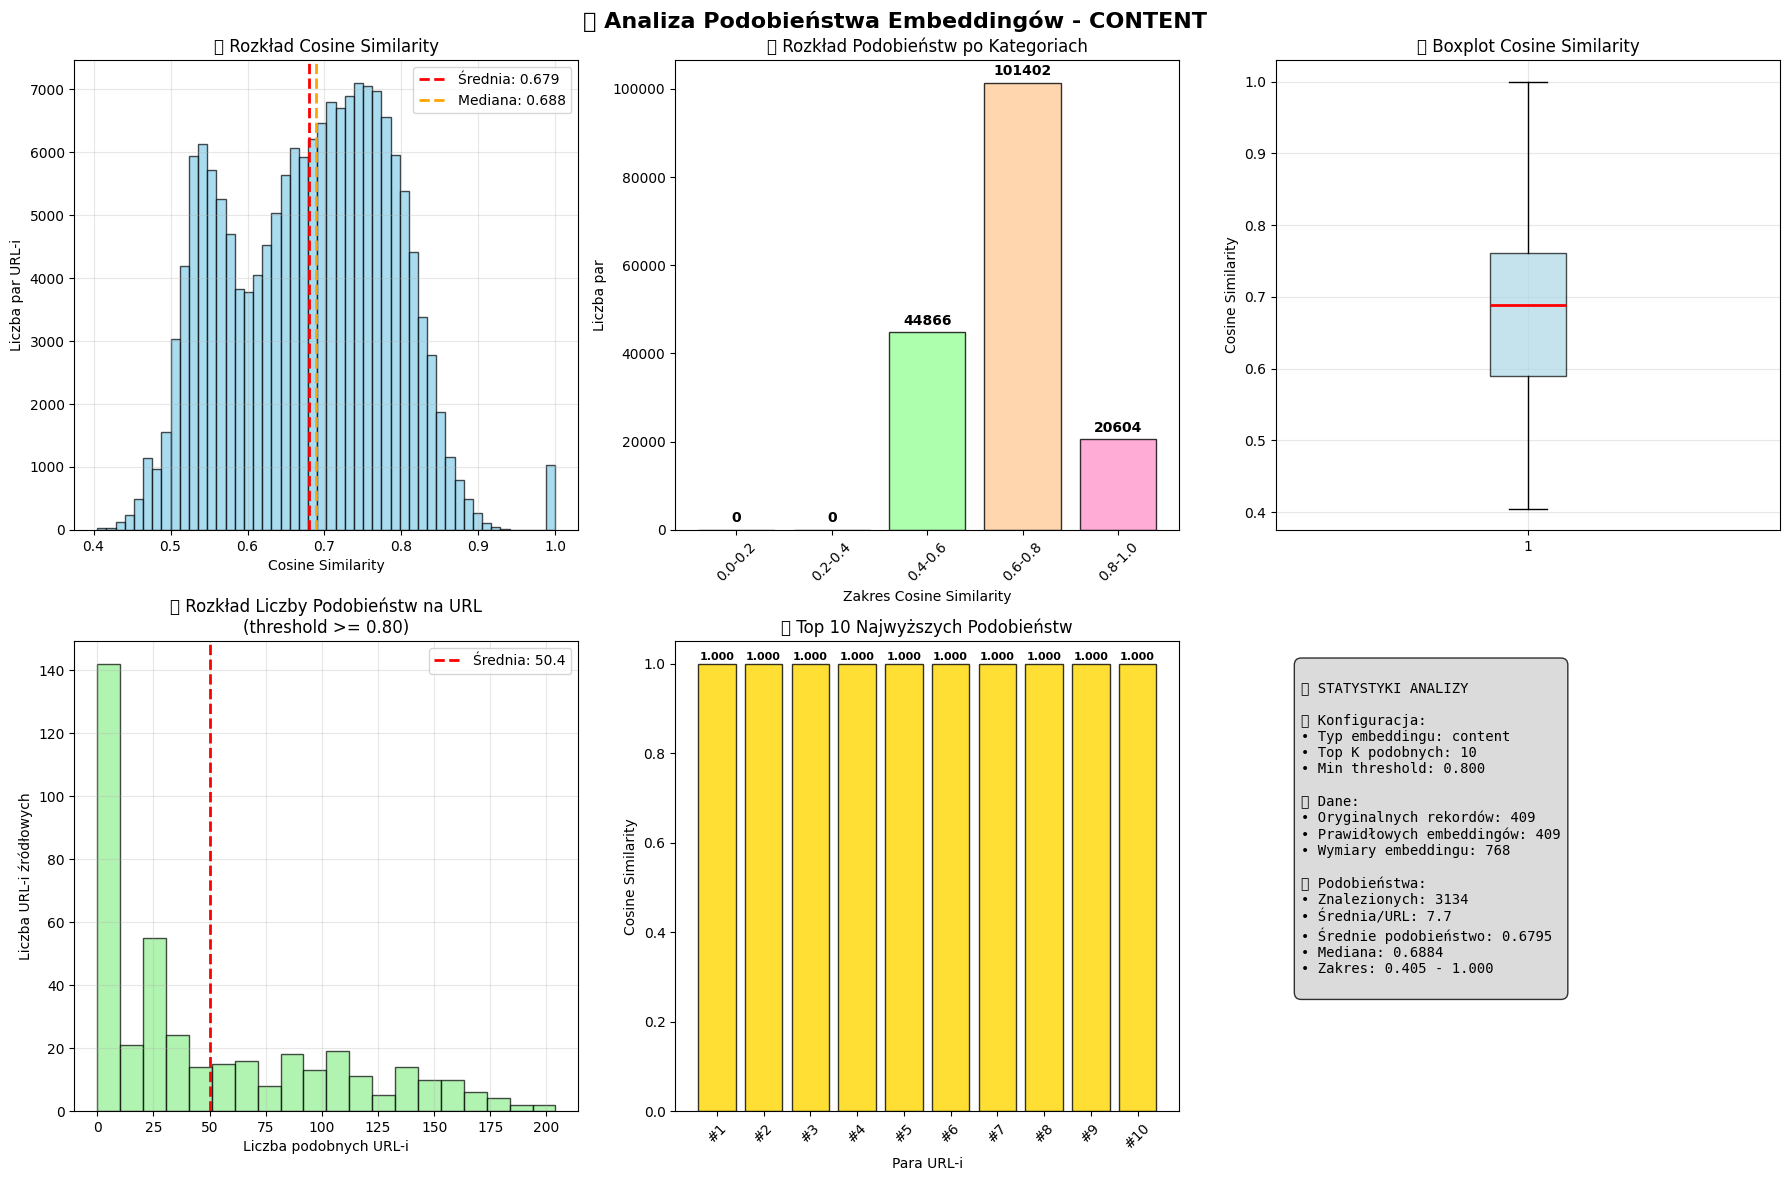


🏆 TOP 10 NAJLEPSZYCH PODOBIEŃSTW:


,Ranking,Podobieństwo,URL Źródłowy,URL Podobny
0,1,1.0000,https://www.senuto.com/pl/blog/linkowani...,https://www.senuto.com/pl/blog/linkowani...
1,2,1.0000,https://www.senuto.com/pl/blog/linkowani...,https://www.senuto.com/pl/blog/linkowani...
2,3,1.0000,https://www.senuto.com/pl/blog/video/pod...,https://www.senuto.com/pl/blog/video/pod...
3,4,1.0000,https://www.senuto.com/pl/blog/video/pod...,https://www.senuto.com/pl/blog/video/pod...
4,5,1.0000,https://www.senuto.com/pl/blog/video/pod...,https://www.senuto.com/pl/blog/podcast
5,6,1.0000,https://www.senuto.com/pl/blog/video/pod...,https://www.senuto.com/pl/blog/video/pod...
6,7,1.0000,https://www.senuto.com/pl/blog/video/pod...,https://www.senuto.com/pl/blog/video/pod...
7,8,1.0000,https://www.senuto.com/pl/blog/video/pod...,https://www.senuto.com/pl/blog/podcast
8,9,1.0000,https://www.senuto.com/pl/blog/video/pod...,https://www.senuto.com/pl/blog/video/pod...
9,10,1.0000,https://www.senuto.com/pl/blog/video/pod...,https://www.senuto.com/pl/blog/video/pod...



📋 Przygotowywanie uproszczonej struktury danych...

💾 Zapisywanie wyników do plików CSV...
✅ Główne wyniki zapisane do: multithreaded_crawl_results_20250607_084019_embeddings_20250607_084640_similarity_content_top10_20250607_084645.csv
✅ URL-e + sąsiedzi zapisane do: multithreaded_crawl_results_20250607_084019_embeddings_20250607_084640_neighbors_content_top10_20250607_084645.csv

📁 Utworzone pliki:
   🟦 multithreaded_crawl_results_20250607_084019_embeddings_20250607_084640_similarity_content_top10_20250607_084645.csv: Pełna analiza podobieństwa (409 rekordów)
   🔗 multithreaded_crawl_results_20250607_084019_embeddings_20250607_084640_neighbors_content_top10_20250607_084645.csv: URL źródłowy + sąsiedzi (409 URL-i)
   - Każdy URL ma 10 kolumn sąsiadów
   - Format kolumn: url_similarity

📊 Podsumowanie analizy podobieństwa:
   ✅ Przeanalizowano URL-i: 409
   🔗 Znalezione podobieństwa: 3134
   📈 Średnia podobnych per URL: 7.7
   🎯 Średnie cosine similarity: 0.6795
   📏 Zakres podobieństw

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


🏁 Zakończono analizę podobieństwa URL-i.


In [ ]:
#@markdown Ta komórka wczyta plik CSV z embeddingami, obliczy cosine similarity między wszystkimi URL-ami,
#@markdown znajdzie 20 najbardziej podobnych URL-i dla każdego rekordu i zapisze wyniki do nowego CSV.
#@markdown <br>
#@markdown **Kroki:**
#@markdown 1. Uruchom tę komórkę - automatycznie znajdzie najnowszy plik z embeddingami
#@markdown 2. Wybierz typ embeddingu do analizy (metadane vs treść główna)
#@markdown 3. Skrypt obliczy podobieństwa i zapisze wyniki do CSV
#@markdown 4. Każdy z 20 najbardziej podobnych URL-i będzie w oddzielnej kolumnie
#@markdown ---
#@markdown ### 🎯 Konfiguracja Analizy Podobieństwa:
#@markdown Typ embeddingu do analizy podobieństwa.
embedding_type = "content" #@param ["content", "metadata", "both"] {type:"string"}
#@markdown Liczba najbardziej podobnych URL-i do znalezienia dla każdego rekordu.
top_k_similar = 10 #@param {type:"slider", min:5, max:50, step:5}
#@markdown Minimalny próg cosine similarity (0.0-1.0). URL-e poniżej tego progu będą pomijane.
min_similarity_threshold = 0.8 #@param {type:"slider", min:0.0, max:1.0, step:0.05}
#@markdown Wykluczaj identyczne URL-e (zalecane dla stability).
exclude_self_similarity = True #@param {type:"boolean"}
#@markdown Tylko strony ze statusem success=True i prawidłowymi embeddingami.
only_valid_embeddings = True #@param {type:"boolean"}
#@markdown Format kolumn wynikowych.
output_format = "url_similarity" #@param ["url_similarity", "url_only", "similarity_only"] {type:"string"}
#@markdown Nazwa prefiksu dla kolumn wynikowych.
output_column_prefix = "similar" #@param {type:"string"}

# Krok 1: Instalacja i import potrzebnych bibliotek
#!pip install -q numpy pandas scikit-learn tqdm matplotlib seaborn

import os
import numpy as np
import pandas as pd
import json
import time
from tqdm.notebook import tqdm
import glob
import io
from sklearn.metrics.pairwise import cosine_similarity
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

print("✅ Biblioteki zainstalowane/dostępne.")

def load_embeddings_from_json(embedding_str):
    """Ładuje embedding z JSON string do numpy array"""
    if pd.isna(embedding_str) or embedding_str == '':
        return None
    try:
        embedding_list = json.loads(embedding_str)
        return np.array(embedding_list, dtype=np.float32)
    except (json.JSONDecodeError, ValueError, TypeError):
        return None

def find_similar_urls(embeddings_matrix, url_list, query_idx, top_k, min_threshold, exclude_self=True):
    """
    Znajdź najbardziej podobne URL-e dla danego query_idx

    Args:
        embeddings_matrix: macierz embeddingów (n_samples, embedding_dim)
        url_list: lista URL-i odpowiadająca wierszom w macierzy
        query_idx: indeks zapytania w macierzy
        top_k: liczba najbardziej podobnych do zwrócenia
        min_threshold: minimalny próg podobieństwa
        exclude_self: czy wykluczyć identyczny URL

    Returns:
        lista krotek (url, similarity_score)
    """
    if query_idx >= len(embeddings_matrix):
        return []

    # Oblicz cosine similarity dla query_idx ze wszystkimi innymi
    query_embedding = embeddings_matrix[query_idx].reshape(1, -1)
    similarities = cosine_similarity(query_embedding, embeddings_matrix)[0]

    # Utworz listę (indeks, similarity, url)
    similarity_tuples = []
    for i, sim in enumerate(similarities):
        if exclude_self and i == query_idx:
            continue  # Pomiń identyczny URL

        if sim >= min_threshold:
            similarity_tuples.append((i, sim, url_list[i]))

    # Sortuj malejąco po podobieństwie
    similarity_tuples.sort(key=lambda x: x[1], reverse=True)

    # Zwróć top_k rezultatów jako (url, similarity)
    return [(url, sim) for _, sim, url in similarity_tuples[:top_k]]

def format_similarity_result(url, similarity, output_format):
    """Formatuje wynik podobieństwa zgodnie z wybranym formatem"""
    if output_format == "url_similarity":
        return f"{url} | {similarity:.4f}"
    elif output_format == "url_only":
        return url
    elif output_format == "similarity_only":
        return f"{similarity:.4f}"
    else:
        return f"{url} | {similarity:.4f}"  # default

# Krok 2: Automatyczne wczytanie najnowszego pliku z embeddingami
print("\n🔎 Szukam najnowszego pliku CSV z embeddingami...")

# Szukaj plików CSV z embeddingami w /content/
embeddings_files = []
all_csv_files = glob.glob("/content/*embeddings*.csv")

if all_csv_files:
    # Sortuj według czasu modyfikacji (najnowszy pierwszy)
    all_csv_files.sort(key=os.path.getmtime, reverse=True)

    print(f"✅ Znaleziono {len(all_csv_files)} plików z embeddingami:")
    for i, file_path in enumerate(all_csv_files[:5]):  # Pokaż maksymalnie 5
        file_time = os.path.getmtime(file_path)
        formatted_time = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(file_time))
        print(f"   {i+1}. {os.path.basename(file_path)} ({formatted_time})")

    # Użyj najnowszego pliku
    input_filename = all_csv_files[0]
    print(f"\n📂 Wybrany plik: {os.path.basename(input_filename)}")

else:
    print("🟡 Nie znaleziono plików CSV z embeddingami w /content/")
    print("📤 Prześlij plik CSV z embeddingami...")
    try:
        uploaded = files.upload()
        if uploaded:
            input_filename = list(uploaded.keys())[0]
            # Zapisz przesłany plik
            with open(input_filename, 'wb') as f:
                f.write(uploaded[input_filename])
            print(f"📄 Przesłano: {input_filename}")
        else:
            raise SystemExit("❌ Nie przesłano pliku.")
    except SystemExit:
        raise
    except Exception as e:
        raise SystemExit(f"❌ Błąd upload: {e}")

# Krok 3: Wczytanie i walidacja danych
try:
    # Wczytaj CSV
    try:
        df = pd.read_csv(input_filename)
    except:
        print("⚠️ Próba odczytu z separatorem ;")
        df = pd.read_csv(input_filename, sep=';')

    print(f"📊 Wczytano {len(df)} rekordów z {os.path.basename(input_filename)}")
    print(f"📋 Kolumny: {list(df.columns)}")

    # Sprawdź dostępne kolumny embeddingów
    embedding_columns = [col for col in df.columns if 'embedding' in col.lower()]
    print(f"🧭 Dostępne kolumny embeddingów: {embedding_columns}")

    # Określ kolumny do użycia na podstawie embedding_type
    target_columns = []
    if embedding_type == "content":
        content_cols = [col for col in embedding_columns if 'content' in col.lower()]
        if content_cols:
            target_columns = [content_cols[0]]  # Użyj pierwszej znalezionej
        else:
            print("⚠️ Nie znaleziono kolumn z embeddingami treści")

    elif embedding_type == "metadata":
        metadata_cols = [col for col in embedding_columns if 'metadata' in col.lower()]
        if metadata_cols:
            target_columns = [metadata_cols[0]]  # Użyj pierwszej znalezionej
        else:
            print("⚠️ Nie znaleziono kolumn z embeddingami metadanych")

    elif embedding_type == "both":
        content_cols = [col for col in embedding_columns if 'content' in col.lower()]
        metadata_cols = [col for col in embedding_columns if 'metadata' in col.lower()]
        if content_cols:
            target_columns.append(content_cols[0])
        if metadata_cols:
            target_columns.append(metadata_cols[0])

    if not target_columns:
        available_options = ", ".join(embedding_columns) if embedding_columns else "brak"
        raise SystemExit(f"❌ Nie znaleziono odpowiednich kolumn embeddingów dla typu '{embedding_type}'. Dostępne: {available_options}")

    print(f"🎯 Wybrane kolumny embeddingów: {target_columns}")

    # Sprawdź wymaganą kolumnę URL
    if 'url' not in df.columns:
        raise SystemExit("❌ Brak wymaganej kolumny 'url'")

    # Opcjonalne filtrowanie tylko prawidłowych embeddingów
    original_count = len(df)

    if only_valid_embeddings:
        # Filtruj rekordy z prawidłowymi embeddingami
        valid_mask = pd.Series([True] * len(df))

        for col in target_columns:
            # Sprawdź czy embedding nie jest null/empty i ma status success
            status_col = f"{col}_status"

            col_valid = (
                df[col].notna() &
                (df[col] != '') &
                (df[col] != 'null')
            )

            # Jeśli jest kolumna statusu, sprawdź też ją
            if status_col in df.columns:
                col_valid = col_valid & (df[status_col] == 'success')

            valid_mask = valid_mask & col_valid

        df = df[valid_mask].copy()
        print(f"🔍 Filtr prawidłowych embeddingów: {len(df)}/{original_count} rekordów")

    if len(df) == 0:
        raise SystemExit("❌ Brak rekordów po filtrowaniu.")

    # Krok 4: Przygotowanie macierzy embeddingów
    print(f"\n⚙️ Przygotowywanie macierzy embeddingów...")

    # Zbierz wszystkie prawidłowe embeddingi
    all_embeddings = []
    valid_indices = []
    valid_urls = []

    for idx, row in df.iterrows():
        # Ładuj embeddingi dla wybranych kolumn
        row_embeddings = []

        for col in target_columns:
            embedding = load_embeddings_from_json(row[col])
            if embedding is not None:
                row_embeddings.append(embedding)

        if row_embeddings:
            if len(row_embeddings) == 1:
                # Jeden embedding
                combined_embedding = row_embeddings[0]
            else:
                # Średnia z wielu embeddingów (dla typu "both")
                combined_embedding = np.mean(row_embeddings, axis=0)

            all_embeddings.append(combined_embedding)
            valid_indices.append(idx)
            valid_urls.append(row['url'])

    if len(all_embeddings) == 0:
        raise SystemExit("❌ Brak prawidłowych embeddingów do analizy.")

    # Utworz macierz embeddingów
    embeddings_matrix = np.vstack(all_embeddings)
    print(f"📏 Macierz embeddingów: {embeddings_matrix.shape} (rekordy × wymiary)")
    print(f"🌐 URL-e do analizy: {len(valid_urls)}")

    # Krok 5: Obliczanie podobieństw dla wszystkich URL-i
    print(f"\n🔍 Obliczanie podobieństw dla {len(valid_urls)} URL-i...")
    print(f"🎯 Parametry: top_k={top_k_similar}, min_threshold={min_similarity_threshold:.2f}")

    # Przygotuj DataFrame wynikowy
    results_df = df[df.index.isin(valid_indices)].copy()

    # Dodaj kolumny dla podobnych URL-i
    for i in range(top_k_similar):
        col_name = f"{output_column_prefix}_{i+1:02d}"
        results_df[col_name] = ""

    # Oblicz podobieństwa dla każdego URL-a
    similarity_stats = {
        'total_processed': 0,
        'total_similarities_found': 0,
        'avg_similarities_per_url': 0
    }

    for i, (df_idx, url) in enumerate(tqdm(zip(valid_indices, valid_urls), total=len(valid_urls), desc="Analiza podobieństwa")):

        # Znajdź podobne URL-e
        similar_results = find_similar_urls(
            embeddings_matrix=embeddings_matrix,
            url_list=valid_urls,
            query_idx=i,  # indeks w macierzy embeddingów
            top_k=top_k_similar,
            min_threshold=min_similarity_threshold,
            exclude_self=exclude_self_similarity
        )

        # Zapisz wyniki do odpowiednich kolumn
        for j, (similar_url, similarity) in enumerate(similar_results):
            if j < top_k_similar:
                col_name = f"{output_column_prefix}_{j+1:02d}"
                formatted_result = format_similarity_result(similar_url, similarity, output_format)
                results_df.loc[df_idx, col_name] = formatted_result

        # Statystyki
        similarity_stats['total_processed'] += 1
        similarity_stats['total_similarities_found'] += len(similar_results)

    # Oblicz średnie statystyki
    if similarity_stats['total_processed'] > 0:
        similarity_stats['avg_similarities_per_url'] = similarity_stats['total_similarities_found'] / similarity_stats['total_processed']

    # Krok 6: Generowanie raportu analizy i wizualizacji
    print(f"\n📊 Generowanie raportu analizy podobieństwa...")

    # Zbierz dodatkowe statystyki
    all_similarities = []
    similarity_distribution = {'0.0-0.2': 0, '0.2-0.4': 0, '0.4-0.6': 0, '0.6-0.8': 0, '0.8-1.0': 0}
    similarity_per_url = []  # Liczba podobieństw na URL

    for i, (df_idx, url) in enumerate(zip(valid_indices, valid_urls)):
        # Znajdź wszystkie podobieństwa dla tego URL-a (nie tylko top_k)
        similar_results = find_similar_urls(
            embeddings_matrix=embeddings_matrix,
            url_list=valid_urls,
            query_idx=i,
            top_k=len(valid_urls),  # Wszystkie podobieństwa
            min_threshold=0.0,  # Bez filtrowania
            exclude_self=exclude_self_similarity
        )

        url_similarities = []
        for _, similarity in similar_results:
            all_similarities.append(similarity)
            url_similarities.append(similarity)
            # Kategoryzuj podobieństwo
            if similarity < 0.2:
                similarity_distribution['0.0-0.2'] += 1
            elif similarity < 0.4:
                similarity_distribution['0.2-0.4'] += 1
            elif similarity < 0.6:
                similarity_distribution['0.4-0.6'] += 1
            elif similarity < 0.8:
                similarity_distribution['0.6-0.8'] += 1
            else:
                similarity_distribution['0.8-1.0'] += 1

        # Ile podobieństw >= threshold dla tego URL
        high_sim_count = len([s for s in url_similarities if s >= min_similarity_threshold])
        similarity_per_url.append(high_sim_count)

    # === WIZUALIZACJE W GOOGLE COLAB ===
    print(f"\n🎨 Generowanie wizualizacji analizy podobieństwa...")

    # Konfiguracja matplotlib
    plt.style.use('default')
    sns.set_palette("husl")

    # Figura z wieloma wykresami
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle(f'📊 Analiza Podobieństwa Embeddingów - {embedding_type.upper()}', fontsize=16, fontweight='bold')

    # 1. Histogram rozkładu podobieństw
    axes[0, 0].hist(all_similarities, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].axvline(np.mean(all_similarities), color='red', linestyle='--', linewidth=2, label=f'Średnia: {np.mean(all_similarities):.3f}')
    axes[0, 0].axvline(np.median(all_similarities), color='orange', linestyle='--', linewidth=2, label=f'Mediana: {np.median(all_similarities):.3f}')
    axes[0, 0].set_title('📈 Rozkład Cosine Similarity')
    axes[0, 0].set_xlabel('Cosine Similarity')
    axes[0, 0].set_ylabel('Liczba par URL-i')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # 2. Wykres słupkowy kategorii podobieństw
    categories = list(similarity_distribution.keys())
    counts = list(similarity_distribution.values())
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']

    bars = axes[0, 1].bar(categories, counts, color=colors, alpha=0.8, edgecolor='black')
    axes[0, 1].set_title('📊 Rozkład Podobieństw po Kategoriach')
    axes[0, 1].set_xlabel('Zakres Cosine Similarity')
    axes[0, 1].set_ylabel('Liczba par')
    axes[0, 1].tick_params(axis='x', rotation=45)

    # Dodaj wartości na słupkach
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + max(counts)*0.01,
                        f'{count}', ha='center', va='bottom', fontweight='bold')

    # 3. Boxplot podobieństw
    axes[0, 2].boxplot(all_similarities, patch_artist=True,
                       boxprops=dict(facecolor='lightblue', alpha=0.7),
                       medianprops=dict(color='red', linewidth=2))
    axes[0, 2].set_title('📦 Boxplot Cosine Similarity')
    axes[0, 2].set_ylabel('Cosine Similarity')
    axes[0, 2].grid(True, alpha=0.3)

    # 4. Histogram liczby podobieństw na URL
    axes[1, 0].hist(similarity_per_url, bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[1, 0].axvline(np.mean(similarity_per_url), color='red', linestyle='--', linewidth=2,
                       label=f'Średnia: {np.mean(similarity_per_url):.1f}')
    axes[1, 0].set_title(f'🔗 Rozkład Liczby Podobieństw na URL\n(threshold >= {min_similarity_threshold:.2f})')
    axes[1, 0].set_xlabel('Liczba podobnych URL-i')
    axes[1, 0].set_ylabel('Liczba URL-i źródłowych')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # 5. Top 10 najwyższych podobieństw
    if all_similarities:
        # Znajdź top 10 najlepszych podobieństw
        similarity_pairs = []
        for i, (df_idx, url) in enumerate(zip(valid_indices, valid_urls)):
            similar_results = find_similar_urls(
                embeddings_matrix=embeddings_matrix,
                url_list=valid_urls,
                query_idx=i,
                top_k=3,  # Top 3 dla każdego
                min_threshold=min_similarity_threshold,
                exclude_self=exclude_self_similarity
            )

            for similar_url, similarity in similar_results:
                similarity_pairs.append((similarity, url, similar_url))

        # Sortuj i weź top 10
        similarity_pairs.sort(reverse=True)
        top_pairs = similarity_pairs[:10]

        if top_pairs:
            top_scores = [pair[0] for pair in top_pairs]
            top_labels = [f"Pair {i+1}" for i in range(len(top_pairs))]

            bars = axes[1, 1].bar(range(len(top_scores)), top_scores, color='gold', alpha=0.8, edgecolor='black')
            axes[1, 1].set_title('🏆 Top 10 Najwyższych Podobieństw')
            axes[1, 1].set_xlabel('Para URL-i')
            axes[1, 1].set_ylabel('Cosine Similarity')
            axes[1, 1].set_xticks(range(len(top_scores)))
            axes[1, 1].set_xticklabels([f"#{i+1}" for i in range(len(top_scores))], rotation=45)

            # Dodaj wartości na słupkach
            for i, (bar, score) in enumerate(zip(bars, top_scores)):
                height = bar.get_height()
                axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.005,
                                f'{score:.3f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

    # 6. Statystyki podsumowujące
    axes[1, 2].axis('off')
    stats_text = f"""
📊 STATYSTYKI ANALIZY

🔧 Konfiguracja:
• Typ embeddingu: {embedding_type}
• Top K podobnych: {top_k_similar}
• Min threshold: {min_similarity_threshold:.3f}

📈 Dane:
• Oryginalnych rekordów: {original_count}
• Prawidłowych embeddingów: {len(valid_urls)}
• Wymiary embeddingu: {embeddings_matrix.shape[1]}

🎯 Podobieństwa:
• Znalezionych: {similarity_stats['total_similarities_found']}
• Średnia/URL: {similarity_stats['avg_similarities_per_url']:.1f}
• Średnie podobieństwo: {np.mean(all_similarities):.4f}
• Mediana: {np.median(all_similarities):.4f}
• Zakres: {np.min(all_similarities):.3f} - {np.max(all_similarities):.3f}
"""

    axes[1, 2].text(0.05, 0.95, stats_text, transform=axes[1, 2].transAxes,
                    fontsize=10, verticalalignment='top', fontfamily='monospace',
                    bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))

    plt.tight_layout()
    plt.show()

    # Dodatkowa tabela z top podobieństwami
    if top_pairs:
        print(f"\n🏆 TOP 10 NAJLEPSZYCH PODOBIEŃSTW:")
        print("="*80)

        top_df = pd.DataFrame([
            {
                'Ranking': i+1,
                'Podobieństwo': f"{similarity:.4f}",
                'URL Źródłowy': source_url[:40] + '...' if len(source_url) > 40 else source_url,
                'URL Podobny': similar_url[:40] + '...' if len(similar_url) > 40 else similar_url
            }
            for i, (similarity, source_url, similar_url) in enumerate(top_pairs)
        ])

        display(top_df)

    # Przygotuj prosty DataFrame tylko z URL + sąsiadami
    print(f"\n📋 Przygotowywanie uproszczonej struktury danych...")
    simple_results = []

    for i, (df_idx, url) in enumerate(zip(valid_indices, valid_urls)):
        # Znajdź top_k podobnych dla tego URL
        similar_results = find_similar_urls(
            embeddings_matrix=embeddings_matrix,
            url_list=valid_urls,
            query_idx=i,
            top_k=top_k_similar,
            min_threshold=min_similarity_threshold,
            exclude_self=exclude_self_similarity
        )

        # Przygotuj rekord
        record = {'url_zrodlowy': url}

        # Dodaj sąsiadów
        for j in range(top_k_similar):
            if j < len(similar_results):
                similar_url, similarity = similar_results[j]
                if output_format == "url_similarity":
                    record[f'sasiad_{j+1:02d}'] = f"{similar_url} | {similarity:.4f}"
                elif output_format == "url_only":
                    record[f'sasiad_{j+1:02d}'] = similar_url
                else:
                    record[f'sasiad_{j+1:02d}'] = f"{similar_url} | {similarity:.4f}"
            else:
                record[f'sasiad_{j+1:02d}'] = ""

        simple_results.append(record)

    simple_df = pd.DataFrame(simple_results)

    # Krok 7: Zapisywanie wyników do CSV
    timestamp = time.strftime("%Y%m%d_%H%M%S")
    base_name = os.path.splitext(os.path.basename(input_filename))[0]

    # Nazwy plików wyjściowych
    main_filename = f"{base_name}_similarity_{embedding_type}_top{top_k_similar}_{timestamp}.csv"
    neighbors_filename = f"{base_name}_neighbors_{embedding_type}_top{top_k_similar}_{timestamp}.csv"

    print(f"\n💾 Zapisywanie wyników do plików CSV...")

    try:
        # Zapisz główne wyniki podobieństwa
        results_df.to_csv(main_filename, index=False, encoding='utf-8')
        print(f"✅ Główne wyniki zapisane do: {main_filename}")

        # Zapisz prosty format URL + sąsiedzi
        simple_df.to_csv(neighbors_filename, index=False, encoding='utf-8')
        print(f"✅ URL-e + sąsiedzi zapisane do: {neighbors_filename}")

        print(f"\n📁 Utworzone pliki:")
        print(f"   🟦 {main_filename}: Pełna analiza podobieństwa ({len(results_df)} rekordów)")
        print(f"   🔗 {neighbors_filename}: URL źródłowy + sąsiedzi ({len(simple_df)} URL-i)")
        print(f"   - Każdy URL ma {top_k_similar} kolumn sąsiadów")
        print(f"   - Format kolumn: {output_format}")

    except Exception as e:
        print(f"❌ Błąd podczas zapisywania plików CSV: {str(e)}")

    # Statystyki końcowe
    print(f"\n📊 Podsumowanie analizy podobieństwa:")
    print(f"   ✅ Przeanalizowano URL-i: {similarity_stats['total_processed']}")
    print(f"   🔗 Znalezione podobieństwa: {similarity_stats['total_similarities_found']}")
    print(f"   📈 Średnia podobnych per URL: {similarity_stats['avg_similarities_per_url']:.1f}")
    if all_similarities:
        print(f"   🎯 Średnie cosine similarity: {np.mean(all_similarities):.4f}")
        print(f"   📏 Zakres podobieństw: {np.min(all_similarities):.4f} - {np.max(all_similarities):.4f}")

    # Przykłady wyników (skrócone)
    print(f"\n📋 Przykłady znalezionych podobieństw:")
    sample_size = min(2, len(simple_df))

    for i, (idx, row) in enumerate(simple_df.head(sample_size).iterrows()):
        print(f"\n   {i+1}. URL Źródłowy: {row['url_zrodlowy'][:80]}...")

        # Pokaż pierwsze 2 sąsiadów
        for j in range(min(2, top_k_similar)):
            col_name = f'sasiad_{j+1:02d}'
            neighbor = row[col_name]
            if neighbor:
                print(f"      Sąsiad #{j+1}: {neighbor[:80]}...")
            else:
                break

    # Pobierz pliki
    print(f"\n📥 Pobieranie plików CSV...")
    files.download(main_filename)
    files.download(neighbors_filename)

except SystemExit:
    raise
except Exception as e:
    print(f"❌ Błąd analizy podobieństwa: {e}")
    import traceback
    traceback.print_exc()

print("\n🏁 Zakończono analizę podobieństwa URL-i.")

# 🚨 Detektor Duplikatów Treści i Kanibalizacji SEO

Ten skrypt automatycznie wykrywa problemy z duplikatami treści i kanibalizacją SEO na podstawie **embeddingów metadanych** (tytuł + opis) używając metryki cosine similarity.


## 📁 **Plik wyjściowy**

### `*_content_issues_*.csv` zawiera:
- **url_1, url_2** - para stron z problemem
- **similarity** - wartość cosine similarity
- **issue_type** - `duplicate_content` lub `kanibalizacja`
- **url_1_title, url_1_description** - dane pierwszej strony
- **url_2_title, url_2_description** - dane drugiej strony

## 📈 **Interpretacja wyników**

### 🔴 **Similarity = 1.0 (Duplikaty)**
- **Działanie**: Usuń duplikaty lub dodaj canonical URL
- **Priorytet**: **WYSOKI** - natychmiastowa akcja

### 🟠 **Similarity 0.9-0.999 (Kanibalizacja)**
- **Działanie**: Zróżnicuj treści lub scal strony
- **Priorytet**: **ŚREDNI** - planowanie optymalizacji

### ✅ **Similarity < 0.9**
- **Oznacza**: Brak problemów z kanibalizacją
- **Działanie**: Monitoruj przy dodawaniu nowych treści


✅ Biblioteki zainstalowane/dostępne.

🔧 Konfiguracja detektora duplikatów i kanibalizacji:
📊 Progi podobieństwa:
   🔴 Duplicate Content: = 1.0
   🟠 Kanibalizacja SEO: 0.9 - 0.999
🎯 Kolumna embeddingu: metadata_embedding_gemini

🔍 Szukanie plików CSV z embeddingami...
✅ Znaleziono plik z embeddingami: multithreaded_crawl_results_20250607_074145_embeddings_20250607_075300.csv

📊 Wczytywanie danych z pliku: multithreaded_crawl_results_20250607_074145_embeddings_20250607_075300.csv
📈 Wczytano 409 rekordów
📋 Kolumny: ['url', 'http_status', 'title', 'meta_description', 'canonical_url', 'meta_robots', 'h1_headings', 'h2_headings', 'h3_headings', 'main_content', 'content_clusters_count', 'content_similarity_score', 'content_length', 'skip_reason', 'success', 'timestamp', 'metadata_embedding_gemini', 'metadata_embedding_gemini_status', 'content_embedding_gemini', 'content_embedding_gemini_status', 'metadata_text']

🔄 Przygotowanie embeddingów metadanych...


Przetwarzanie embeddingów:   0%|          | 0/409 [00:00<?, ?it/s]

📏 Macierz embeddingów: (409, 768) (rekordy × wymiary)
🌐 URL-e do analizy: 409

🔍 Obliczanie macierzy cosine similarity...
📊 Macierz podobieństwa: (409, 409)
🎯 Zakres podobieństw: 0.4696 - 1.0000

🚨 Wykrywanie problemów z treścią...

📋 PODSUMOWANIE WYKRYTYCH PROBLEMÓW:
🔴 Pary z duplicate content: 42
🟠 Pary z kanibalizacją SEO: 561
🌐 URL-e z duplikatami: 25
🌐 URL-e z kanibalizacją: 83
⚠️  Łącznie problematycznych URL-i: 108

📊 Przygotowywanie raportów...
🔄 Dodawanie informacji o stronach...

🎨 Generowanie wizualizacji...


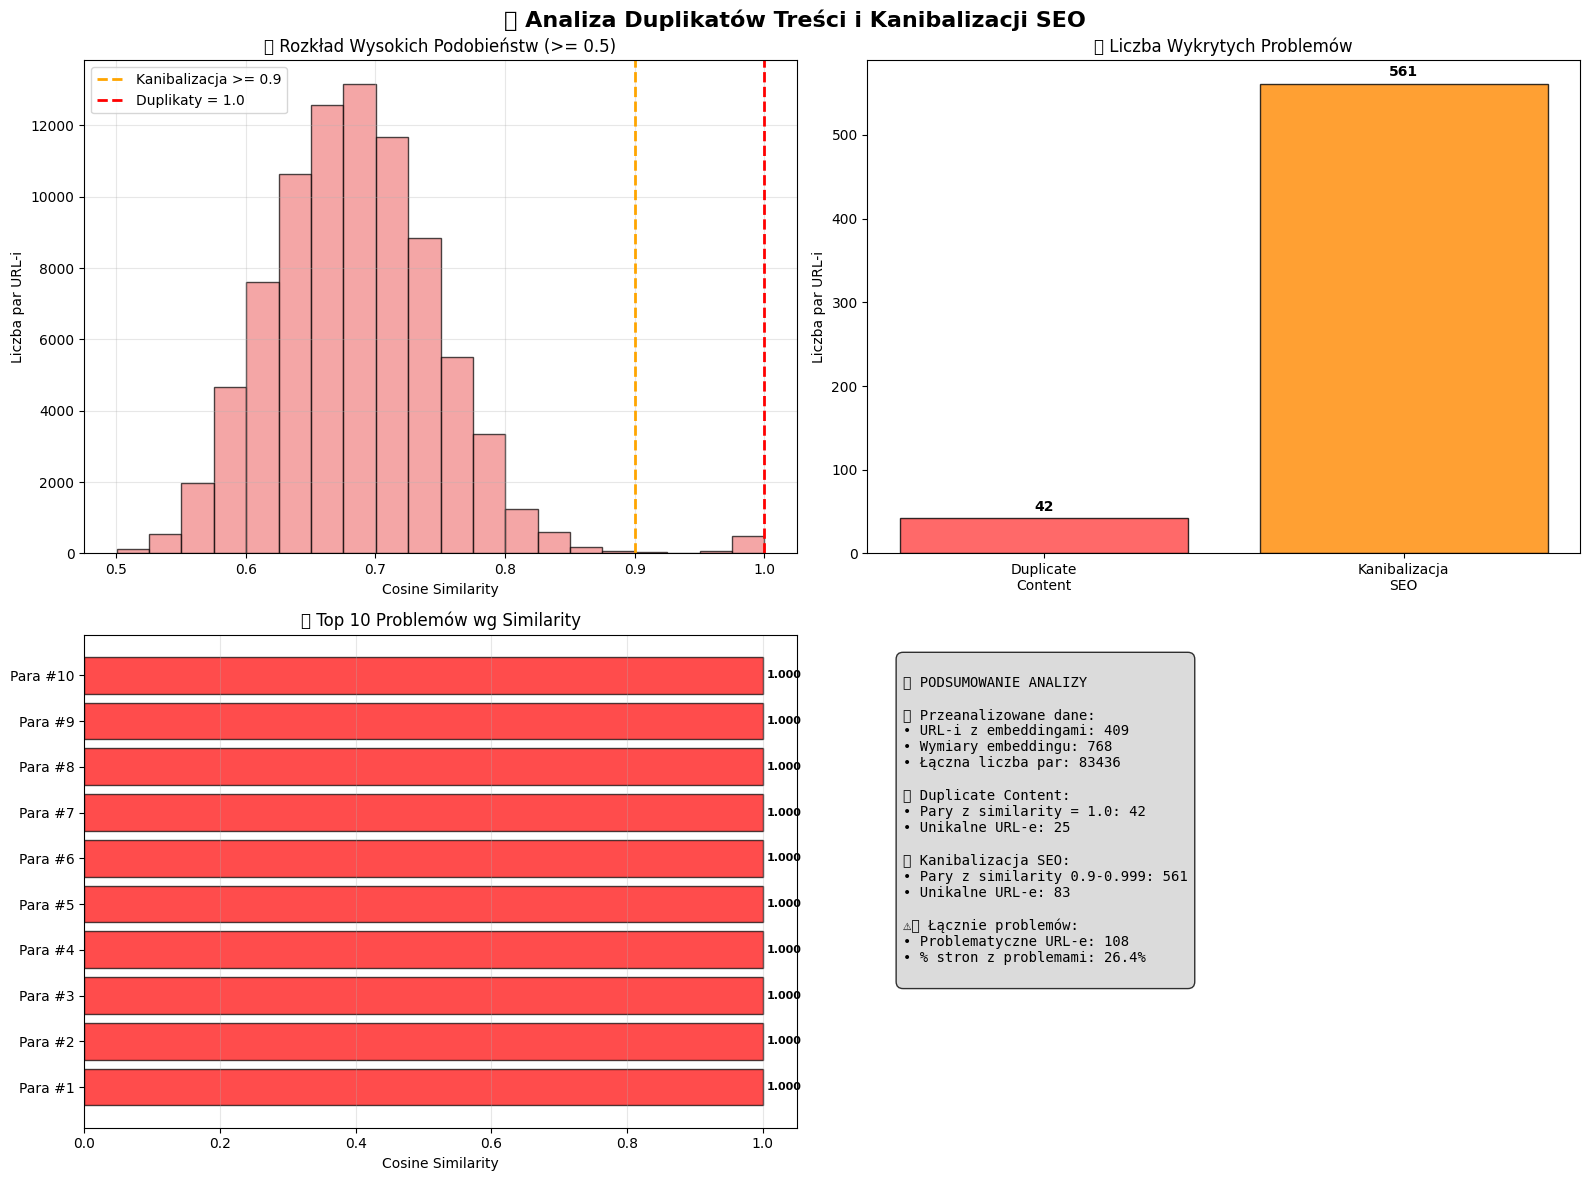


📋 SZCZEGÓŁOWY RAPORT PROBLEMÓW:


,Problem,Similarity,URL 1,Tytuł 1,URL 2,Tytuł 2
0,DUPLIKAT,1.0000,https://www.senuto.com/pl/blog/semantyczne-seo...,"Semantyczne SEO. Poznaj, jak naprawdę działa G...",https://www.senuto.com/pl/blog/semantyczne-seo,"Semantyczne SEO. Poznaj, jak naprawdę działa G..."
1,DUPLIKAT,1.0000,https://www.senuto.com/pl/blog/semantyczne-seo...,"Semantyczne SEO. Poznaj, jak naprawdę działa G...",https://www.senuto.com/pl/blog/semantyczne-seo...,"Semantyczne SEO. Poznaj, jak naprawdę działa G..."
2,DUPLIKAT,1.0000,https://www.senuto.com/pl/blog/semantyczne-seo...,"Semantyczne SEO. Poznaj, jak naprawdę działa G...",https://www.senuto.com/pl/blog/semantyczne-seo,"Semantyczne SEO. Poznaj, jak naprawdę działa G..."
3,DUPLIKAT,1.0000,https://www.senuto.com/pl/blog/content-marketi...,"Content Marketing – porady, wiedza, blog | Senuto",https://www.senuto.com/pl/blog/content-marketing,"Content Marketing – porady, wiedza, blog | Senuto"
4,DUPLIKAT,1.0000,https://www.senuto.com/pl/blog/content-marketi...,"Content Marketing – porady, wiedza, blog | Senuto",https://www.senuto.com/pl/blog/content-marketi...,"Content Marketing – porady, wiedza, blog | Senuto"
5,DUPLIKAT,1.0000,https://www.senuto.com/pl/blog/senuto-tech/page/2,Senuto Tech - nowości w aplikacji,https://www.senuto.com/pl/blog/senuto-tech/page/3,Senuto Tech - nowości w aplikacji
6,DUPLIKAT,1.0000,https://www.senuto.com/pl/blog/content-marketi...,"Content Marketing – porady, wiedza, blog | Senuto",https://www.senuto.com/pl/blog/content-marketi...,"Content Marketing – porady, wiedza, blog | Senuto"
7,DUPLIKAT,1.0000,https://www.senuto.com/pl/blog/senuto-tech,Senuto Tech - nowości w aplikacji,https://www.senuto.com/pl/blog/senuto-tech/page/3,Senuto Tech - nowości w aplikacji
8,DUPLIKAT,1.0000,https://www.senuto.com/pl/blog/content-marketi...,"Content Marketing – porady, wiedza, blog | Senuto",https://www.senuto.com/pl/blog/content-marketi...,"Content Marketing – porady, wiedza, blog | Senuto"
9,DUPLIKAT,1.0000,https://www.senuto.com/pl/blog/content-marketing,"Content Marketing – porady, wiedza, blog | Senuto",https://www.senuto.com/pl/blog/content-marketi...,"Content Marketing – porady, wiedza, blog | Senuto"



💾 Zapisywanie wyników do CSV...
✅ Problemy zapisane do: multithreaded_crawl_results_20250607_074145_embeddings_20250607_075300_content_issues_20250607_075847.csv
   - 603 problemów z treścią
   - 42 duplikatów
   - 561 przypadków kanibalizacji

📥 Pobieranie pliku CSV...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


📊 KOŃCOWE PODSUMOWANIE:
   🔍 Przeanalizowano URL-i: 409
   🔴 Znalezione duplikaty: 42 par
   🟠 Znaleziona kanibalizacja: 561 par
   ⚠️  Problematyczne URL-e: 108 (26.4%)

🏁 Zakończono analizę duplikatów treści i kanibalizacji SEO.


In [ ]:
# Krok 1: Instalacja i import potrzebnych bibliotek
#!pip install -q numpy pandas scikit-learn tqdm matplotlib seaborn

import os
import numpy as np
import pandas as pd
import json
import time
from tqdm.notebook import tqdm
import glob
import io
from sklearn.metrics.pairwise import cosine_similarity
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

print("✅ Biblioteki zainstalowane/dostępne.")

# ===== KONFIGURACJA PARAMETRÓW =====
print("\n🔧 Konfiguracja detektora duplikatów i kanibalizacji:")

# Progi podobieństwa
DUPLICATE_THRESHOLD = 1.0          # Dokładne duplikaty (cosine similarity = 1.0)
CANNIBALIZATION_MIN = 0.9          # Minimalna wartość dla kanibalizacji
CANNIBALIZATION_MAX = 0.999        # Maksymalna wartość dla kanibalizacji (poniżej duplikatów)

# Kolumny z embeddingami metadanych (tytuł + opis)
EMBEDDING_COLUMN = "metadata_embedding_gemini"  # Nazwa kolumny z embeddingiem metadanych

# Konfiguracja wyświetlania
MAX_DISPLAY_RESULTS = 50           # Maksymalna liczba wyników do wyświetlenia
TRUNCATE_URL_LENGTH = 80           # Długość URL-i w wyświetlanych wynikach

print(f"📊 Progi podobieństwa:")
print(f"   🔴 Duplicate Content: = {DUPLICATE_THRESHOLD}")
print(f"   🟠 Kanibalizacja SEO: {CANNIBALIZATION_MIN} - {CANNIBALIZATION_MAX}")
print(f"🎯 Kolumna embeddingu: {EMBEDDING_COLUMN}")

# ===== FUNKCJE POMOCNICZE =====

def load_embeddings_from_json(embedding_str):
    """Wczytaj embedding z formatu JSON string."""
    try:
        if pd.isna(embedding_str) or embedding_str == "":
            return None

        # Próbuj wczytać jako JSON
        embedding = json.loads(embedding_str)
        return np.array(embedding, dtype=np.float32)
    except:
        return None

def detect_content_issues(similarity_matrix, urls, duplicate_threshold=1.0,
                         cannibalization_min=0.9, cannibalization_max=0.999):
    """
    Wykryj problemy z duplikatami i kanibalizacją na podstawie macierzy podobieństwa.

    Returns:
        duplicates: lista par (url1, url2, similarity) dla duplikatów
        cannibalization: lista par (url1, url2, similarity) dla kanibalizacji
    """

    duplicates = []
    cannibalization = []

    n_urls = len(urls)

    # Sprawdź wszystkie pary URL-i
    for i in range(n_urls):
        for j in range(i + 1, n_urls):  # i+1 aby uniknąć duplikowania par
            similarity = similarity_matrix[i, j]

            if similarity >= duplicate_threshold:
                duplicates.append({
                    'url_1': urls[i],
                    'url_2': urls[j],
                    'similarity': similarity,
                    'issue_type': 'duplicate_content'
                })
            elif cannibalization_min <= similarity <= cannibalization_max:
                cannibalization.append({
                    'url_1': urls[i],
                    'url_2': urls[j],
                    'similarity': similarity,
                    'issue_type': 'kanibalizacja'
                })

    return duplicates, cannibalization

def create_issue_summary(duplicates, cannibalization):
    """Stwórz podsumowanie znalezionych problemów."""

    total_duplicates = len(duplicates)
    total_cannibalization = len(cannibalization)

    # Unikalne URL-e z problemami
    urls_with_duplicates = set()
    urls_with_cannibalization = set()

    for dup in duplicates:
        urls_with_duplicates.add(dup['url_1'])
        urls_with_duplicates.add(dup['url_2'])

    for cann in cannibalization:
        urls_with_cannibalization.add(cann['url_1'])
        urls_with_cannibalization.add(cann['url_2'])

    summary = {
        'total_duplicate_pairs': total_duplicates,
        'total_cannibalization_pairs': total_cannibalization,
        'unique_urls_with_duplicates': len(urls_with_duplicates),
        'unique_urls_with_cannibalization': len(urls_with_cannibalization),
        'total_problematic_urls': len(urls_with_duplicates | urls_with_cannibalization)
    }

    return summary

# ===== GŁÓWNA LOGIKA ANALIZY =====

try:
    # Krok 2: Automatyczne wykrywanie plików CSV z embeddingami
    print(f"\n🔍 Szukanie plików CSV z embeddingami...")

    # Szukaj plików CSV w bieżącym katalogu
    csv_files = glob.glob("*.csv")

    if not csv_files:
        print("❌ Nie znaleziono plików CSV. Proszę wgrać plik.")
        uploaded = files.upload()
        csv_files = list(uploaded.keys())

    # Znajdź plik z embeddingami
    embedding_file = None
    found_embedding_column = None

    # Lista możliwych nazw kolumn z embeddingami metadanych
    possible_embedding_columns = [
        "metadata_embedding_gemini",
        "metadata_embedding",
        "metadata_embedding_openai",
        "title_description_embedding"
    ]

    for file in csv_files:
        try:
            # Sprawdź czy plik ma kolumnę z embeddingami
            df_sample = pd.read_csv(file, nrows=1)

            # Znajdź pierwszą dostępną kolumnę z embeddingami
            for col in possible_embedding_columns:
                if col in df_sample.columns:
                    embedding_file = file
                    found_embedding_column = col
                    break

            if embedding_file:
                break
        except:
            continue

    if not embedding_file:
        print(f"❌ Nie znaleziono pliku z kolumną embeddingów metadanych")
        print(f"🔍 Szukane kolumny: {', '.join(possible_embedding_columns)}")
        print("📁 Dostępne pliki CSV:")
        for file in csv_files:
            try:
                df_sample = pd.read_csv(file, nrows=1)
                print(f"   - {file}")
                print(f"     Kolumny: {', '.join(df_sample.columns)}")
            except:
                print(f"   - {file} (błąd odczytu)")
        raise SystemExit("Proszę sprawdzić nazwy kolumn z embeddingami.")

    # Użyj znalezionej kolumny
    EMBEDDING_COLUMN = found_embedding_column

    print(f"✅ Znaleziono plik z embeddingami: {embedding_file}")

    # Krok 3: Wczytanie i przygotowanie danych
    print(f"\n📊 Wczytywanie danych z pliku: {embedding_file}")

    df = pd.read_csv(embedding_file)
    original_count = len(df)

    print(f"📈 Wczytano {original_count} rekordów")
    print(f"📋 Kolumny: {list(df.columns)}")

    # Sprawdź czy istnieją wymagane kolumny
    required_columns = ['url', EMBEDDING_COLUMN]
    missing_columns = [col for col in required_columns if col not in df.columns]

    if missing_columns:
        print(f"❌ Brakujące kolumny: {missing_columns}")
        raise SystemExit("Plik musi zawierać kolumny: url, metadata_embedding_gemini")

    # Krok 4: Przygotowanie embeddingów
    print(f"\n🔄 Przygotowanie embeddingów metadanych...")

    valid_embeddings = []
    valid_indices = []
    valid_urls = []

    for idx, row in tqdm(df.iterrows(), total=len(df), desc="Przetwarzanie embeddingów"):

        # Wczytaj embedding metadanych
        embedding = load_embeddings_from_json(row[EMBEDDING_COLUMN])

        if embedding is not None and len(embedding) > 0:
            valid_embeddings.append(embedding)
            valid_indices.append(idx)
            valid_urls.append(row['url'])

    if len(valid_embeddings) == 0:
        raise SystemExit("❌ Brak prawidłowych embeddingów metadanych do analizy.")

    # Utworz macierz embeddingów
    embeddings_matrix = np.vstack(valid_embeddings)
    print(f"📏 Macierz embeddingów: {embeddings_matrix.shape} (rekordy × wymiary)")
    print(f"🌐 URL-e do analizy: {len(valid_urls)}")

    # Krok 5: Obliczanie macierzy podobieństwa
    print(f"\n🔍 Obliczanie macierzy cosine similarity...")

    # Oblicz cosine similarity dla wszystkich par
    similarity_matrix = cosine_similarity(embeddings_matrix)

    print(f"📊 Macierz podobieństwa: {similarity_matrix.shape}")
    print(f"🎯 Zakres podobieństw: {similarity_matrix.min():.4f} - {similarity_matrix.max():.4f}")

    # Krok 6: Wykrywanie problemów z duplikatami i kanibalizacją
    print(f"\n🚨 Wykrywanie problemów z treścią...")

    duplicates, cannibalization = detect_content_issues(
        similarity_matrix=similarity_matrix,
        urls=valid_urls,
        duplicate_threshold=DUPLICATE_THRESHOLD,
        cannibalization_min=CANNIBALIZATION_MIN,
        cannibalization_max=CANNIBALIZATION_MAX
    )

    # Podsumowanie wyników
    summary = create_issue_summary(duplicates, cannibalization)

    print(f"\n📋 PODSUMOWANIE WYKRYTYCH PROBLEMÓW:")
    print(f"🔴 Pary z duplicate content: {summary['total_duplicate_pairs']}")
    print(f"🟠 Pary z kanibalizacją SEO: {summary['total_cannibalization_pairs']}")
    print(f"🌐 URL-e z duplikatami: {summary['unique_urls_with_duplicates']}")
    print(f"🌐 URL-e z kanibalizacją: {summary['unique_urls_with_cannibalization']}")
    print(f"⚠️  Łącznie problematycznych URL-i: {summary['total_problematic_urls']}")

    # Krok 7: Tworzenie DataFrame-ów z wynikami
    print(f"\n📊 Przygotowywanie raportów...")

    # Połącz wszystkie problemy w jeden DataFrame
    all_issues = duplicates + cannibalization

    if all_issues:
        issues_df = pd.DataFrame(all_issues)

        # Dodaj dodatkowe informacje z oryginalnego DataFrame
        def get_page_info(url):
            try:
                row = df[df['url'] == url].iloc[0]
                return {
                    'title': row.get('title', ''),
                    'description': row.get('description', ''),
                    'h2_headings': row.get('h2_headings', '')
                }
            except:
                return {'title': '', 'description': '', 'h2_headings': ''}

        # Dodaj informacje o stronach
        print("🔄 Dodawanie informacji o stronach...")

        issues_df['url_1_title'] = issues_df['url_1'].apply(lambda x: get_page_info(x)['title'])
        issues_df['url_1_description'] = issues_df['url_1'].apply(lambda x: get_page_info(x)['description'])
        issues_df['url_2_title'] = issues_df['url_2'].apply(lambda x: get_page_info(x)['title'])
        issues_df['url_2_description'] = issues_df['url_2'].apply(lambda x: get_page_info(x)['description'])

        # Sortuj według similarity (malejąco)
        issues_df = issues_df.sort_values('similarity', ascending=False).reset_index(drop=True)

    else:
        issues_df = pd.DataFrame()
        print("✅ Nie znaleziono problemów z duplikatami ani kanibalizacją!")

    # Krok 8: Wizualizacje w Google Colab
    if len(all_issues) > 0:
        print(f"\n🎨 Generowanie wizualizacji...")

        # Konfiguracja matplotlib
        plt.style.use('default')
        sns.set_palette("husl")

        # Figura z wykresami
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('🚨 Analiza Duplikatów Treści i Kanibalizacji SEO', fontsize=16, fontweight='bold')

        # 1. Histogram wszystkich podobieństw >= 0.5
        high_similarities = []
        for i in range(len(valid_urls)):
            for j in range(i + 1, len(valid_urls)):
                sim = similarity_matrix[i, j]
                if sim >= 0.5:  # Tylko wysokie podobieństwa
                    high_similarities.append(sim)

        if high_similarities:
            axes[0, 0].hist(high_similarities, bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
            axes[0, 0].axvline(CANNIBALIZATION_MIN, color='orange', linestyle='--', linewidth=2,
                              label=f'Kanibalizacja >= {CANNIBALIZATION_MIN}')
            axes[0, 0].axvline(DUPLICATE_THRESHOLD, color='red', linestyle='--', linewidth=2,
                              label=f'Duplikaty = {DUPLICATE_THRESHOLD}')
            axes[0, 0].set_title('📈 Rozkład Wysokich Podobieństw (>= 0.5)')
            axes[0, 0].set_xlabel('Cosine Similarity')
            axes[0, 0].set_ylabel('Liczba par URL-i')
            axes[0, 0].legend()
            axes[0, 0].grid(True, alpha=0.3)

        # 2. Wykres słupkowy problemów
        problem_counts = [summary['total_duplicate_pairs'], summary['total_cannibalization_pairs']]
        problem_labels = ['Duplicate\nContent', 'Kanibalizacja\nSEO']
        colors = ['#ff4444', '#ff8800']

        bars = axes[0, 1].bar(problem_labels, problem_counts, color=colors, alpha=0.8, edgecolor='black')
        axes[0, 1].set_title('🚨 Liczba Wykrytych Problemów')
        axes[0, 1].set_ylabel('Liczba par URL-i')

        # Dodaj wartości na słupkach
        for bar, count in zip(bars, problem_counts):
            height = bar.get_height()
            if height > 0:
                axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + max(problem_counts)*0.01,
                                f'{int(count)}', ha='center', va='bottom', fontweight='bold')

        # 3. Top problemy według similarity
        if len(issues_df) > 0:
            top_issues = issues_df.head(10)
            issue_colors = ['red' if x == 'duplicate_content' else 'orange' for x in top_issues['issue_type']]

            bars = axes[1, 0].barh(range(len(top_issues)), top_issues['similarity'],
                                  color=issue_colors, alpha=0.7, edgecolor='black')
            axes[1, 0].set_title('🏆 Top 10 Problemów wg Similarity')
            axes[1, 0].set_xlabel('Cosine Similarity')
            axes[1, 0].set_yticks(range(len(top_issues)))
            axes[1, 0].set_yticklabels([f"Para #{i+1}" for i in range(len(top_issues))])
            axes[1, 0].grid(True, alpha=0.3, axis='x')

            # Dodaj wartości
            for i, (bar, sim) in enumerate(zip(bars, top_issues['similarity'])):
                width = bar.get_width()
                axes[1, 0].text(width + 0.005, bar.get_y() + bar.get_height()/2.,
                               f'{sim:.3f}', ha='left', va='center', fontsize=8, fontweight='bold')

        # 4. Statystyki podsumowujące
        axes[1, 1].axis('off')
        stats_text = f"""
🚨 PODSUMOWANIE ANALIZY

📊 Przeanalizowane dane:
• URL-i z embeddingami: {len(valid_urls)}
• Wymiary embeddingu: {embeddings_matrix.shape[1]}
• Łączna liczba par: {len(valid_urls) * (len(valid_urls) - 1) // 2}

🔴 Duplicate Content:
• Pary z similarity = 1.0: {summary['total_duplicate_pairs']}
• Unikalne URL-e: {summary['unique_urls_with_duplicates']}

🟠 Kanibalizacja SEO:
• Pary z similarity 0.9-0.999: {summary['total_cannibalization_pairs']}
• Unikalne URL-e: {summary['unique_urls_with_cannibalization']}

⚠️ Łącznie problemów:
• Problematyczne URL-e: {summary['total_problematic_urls']}
• % stron z problemami: {(summary['total_problematic_urls']/len(valid_urls)*100):.1f}%
"""

        axes[1, 1].text(0.05, 0.95, stats_text, transform=axes[1, 1].transAxes,
                        fontsize=10, verticalalignment='top', fontfamily='monospace',
                        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))

        plt.tight_layout()
        plt.show()

        # Wyświetl szczegółową tabelę z problemami
        if len(issues_df) > 0:
            print(f"\n📋 SZCZEGÓŁOWY RAPORT PROBLEMÓW:")
            print("="*100)

            # Przygotuj tabelę do wyświetlenia
            display_df = []
            for _, row in issues_df.head(MAX_DISPLAY_RESULTS).iterrows():
                display_df.append({
                    'Problem': 'DUPLIKAT' if row['issue_type'] == 'duplicate_content' else 'KANIBALIZACJA',
                    'Similarity': f"{row['similarity']:.4f}",
                    'URL 1': row['url_1'][:TRUNCATE_URL_LENGTH] + ('...' if len(row['url_1']) > TRUNCATE_URL_LENGTH else ''),
                    'Tytuł 1': row['url_1_title'][:50] + ('...' if len(str(row['url_1_title'])) > 50 else ''),
                    'URL 2': row['url_2'][:TRUNCATE_URL_LENGTH] + ('...' if len(row['url_2']) > TRUNCATE_URL_LENGTH else ''),
                    'Tytuł 2': row['url_2_title'][:50] + ('...' if len(str(row['url_2_title'])) > 50 else '')
                })

            display_table = pd.DataFrame(display_df)
            display(display_table)

    # Krok 9: Zapisywanie wyników do CSV
    timestamp = time.strftime("%Y%m%d_%H%M%S")
    base_name = os.path.splitext(os.path.basename(embedding_file))[0]

    if len(all_issues) > 0:
        # Plik z wszystkimi problemami
        issues_filename = f"{base_name}_content_issues_{timestamp}.csv"

        print(f"\n💾 Zapisywanie wyników do CSV...")

        try:
            issues_df.to_csv(issues_filename, index=False, encoding='utf-8')
            print(f"✅ Problemy zapisane do: {issues_filename}")
            print(f"   - {len(issues_df)} problemów z treścią")
            print(f"   - {summary['total_duplicate_pairs']} duplikatów")
            print(f"   - {summary['total_cannibalization_pairs']} przypadków kanibalizacji")

            # Pobierz plik
            print(f"\n📥 Pobieranie pliku CSV...")
            files.download(issues_filename)

        except Exception as e:
            print(f"❌ Błąd podczas zapisywania pliku CSV: {str(e)}")

    else:
        print(f"\n✅ Nie znaleziono problemów - brak pliku do zapisania!")
        print("🎉 Gratulacje! Twoja witryna nie ma problemów z duplikatami treści lub kanibalizacją SEO.")

    # Statystyki końcowe
    print(f"\n📊 KOŃCOWE PODSUMOWANIE:")
    print(f"   🔍 Przeanalizowano URL-i: {len(valid_urls)}")
    print(f"   🔴 Znalezione duplikaty: {summary['total_duplicate_pairs']} par")
    print(f"   🟠 Znaleziona kanibalizacja: {summary['total_cannibalization_pairs']} par")
    print(f"   ⚠️  Problematyczne URL-e: {summary['total_problematic_urls']} ({(summary['total_problematic_urls']/len(valid_urls)*100):.1f}%)")

except SystemExit:
    raise
except Exception as e:
    print(f"❌ Błąd analizy duplikatów: {e}")
    import traceback
    traceback.print_exc()

print("\n🏁 Zakończono analizę duplikatów treści i kanibalizacji SEO.")

## 🚀 Klasteryzacja Treści Stron WWW z Wykorzystaniem Gemini Embeddings (Płaska i Hierarchiczna)
---

### Konfiguracja Parametrów (Formularze Colab)

Poniższa komórka kodowa zawiera **formularze interaktywne**, które pozwalają na łatwą konfigurację zachowania skryptu bez edycji kodu. Po prostu wybierz odpowiednie opcje lub wprowadź wartości.

#### 🚀 Konfiguracja Embeddingów
*   **`REGENERATE_EMBEDDINGS`**: Zdecyduj, czy zawsze generować nowe embeddingi, czy (w przyszłości) korzystać z buforowanych.
*   **`GEMINI_API_KEY`**: Tutaj możesz opcjonalnie wkleić swój klucz API. **Zaleca się jednak używanie Colab Secrets**, pozostawiając to pole puste.
*   **`EMBEDDING_SOURCE`**: Wybierz, które kolumny z pliku CSV mają być użyte do generowania embeddingów. Im więcej tekstu, tym bardziej szczegółowe embeddingi, ale również dłuższy czas generowania.
*   **`EMBEDDING_MODEL`**: Model Gemini do generowania embeddingów. `models/text-embedding-004` jest zazwyczaj bardziej zaawansowany.
*   **`TASK_TYPE`**: Kluczowy parametr dla modeli embeddingowych Gemini. Dla klasteryzacji używamy typu `clustering`.

#### 🎯 Tryb Klasteryzacji
*   **`TRYB_KLASTERYZACJI`**: Wybierz między "Płaska" (standardowy KMeans) a "Hierarchiczna" (dwupoziomowa klasteryzacja KMeans).
*   **Parametry dla trybu 'Płaska'**:
    *   **`AUTO_DETERMINE_CLUSTERS`**: Jeśli `True`, skrypt spróbuje automatycznie znaleźć optymalną liczbę klastrów w zadanym zakresie, używając Metryki Silhouette.
    *   **`MANUAL_CLUSTERS`**: Jeśli `AUTO_DETERMINE_CLUSTERS` jest `False`, możesz ręcznie określić liczbę klastrów.
    *   **`CLUSTER_RANGE_MIN` / `CLUSTER_RANGE_MAX`**: Zakres dla automatycznego wyboru liczby klastrów.
*   **Parametry dla trybu 'Hierarchiczna'**:
    *   **`NUM_SUPER_CLUSTERS`**: Liczba głównych (najwyższego poziomu) klastrów. Każdy z nich zostanie później podzielony na sub-klastry.

#### 📊 Parametry Wizualizacji i Zapisu
*   **`VISUALIZATION_METHODS`**: Wybierz metody redukcji wymiarowości do wizualizacji: `TSNE` i/lub `PCA`. Obie tworzą dwuwymiarową reprezentację danych, co pozwala na ich wykreślenie.
*   **`RANDOM_STATE`**: Liczba losowa zapewniająca powtarzalność wyników klasteryzacji i wizualizacji.
*   **`SHOW_DENDROGRAM`**: Tylko dla trybu hierarchicznego. Wyświetla drzewiastą strukturę klasteryzacji.
*   **`SAVE_VISUALIZATIONS`**: Jeśli `True`, wizualizacje (HTML dla Plotly, PNG dla Matplotlib) zostaną zapisane w nowo utworzonym folderze `wizualizacje_TIMESTAMP` w bieżącym katalogu Colab.
*   **`SHOW_CLUSTER_DETAILS`**: Jeśli `True`, skrypt wyświetli w konsoli szczegółowe informacje o każdym klastrze (lub super-klastrze i sub-klastrach) wraz z przykładowymi URL-ami.
*   **`URLS_TO_SHOW_IN_CONSOLE`**: Ile przykładowych URL-i ma być wyświetlonych dla każdego klastra w konsoli.
*   **`SAVE_DETAILED_RESULTS`**: Jeśli `True`, pełne wyniki klasteryzacji wraz z przypisanymi identyfikatorami klastrów, nazwami klastrów i embeddingami zostaną zapisane do nowego pliku CSV (`advanced_clustering_results_TIMESTAMP.csv`).

#### 🏷️ Parametry Nazw Klastrów
*   **`GENERATE_CLUSTER_NAMES`**: Czy skrypt ma próbować generować opisowe nazwy dla klastrów.
*   **`CLUSTER_NAMING_METHOD`**: Obecnie obsługiwana jest metoda "LLM (Gemini)".
*   **`LLM_NAMING_MODEL`**: Model Gemini do generowania nazw klastrów (np. `gemini-1.5-flash-latest`).
*   **`MAX_CLUSTER_NAME_WORDS`**: Maksymalna liczba słów w generowanej nazwie klastra.

---

### III. Przebieg Działania Skryptu

Po uruchomieniu komórki, skrypt wykona następujące kroki:

1.  **Instalacja Bibliotek:** Zapewni, że wszystkie wymagane biblioteki są zainstalowane i zaktualizowane.
2.  **Wczytanie Danych:** Wczyta najnowszy plik CSV z wynikami crawlingu.
3.  **Generowanie Embeddingów:** Dla każdego URL-a, na podstawie wybranego źródła tekstu, wygeneruje wektor embeddingowy za pomocą Google Gemini. Ten proces może zająć trochę czasu, w zależności od liczby URL-i.
4.  **Klasteryzacja:**
    *   Jeśli wybrano tryb **Płaski**, użyje KMeans do utworzenia klastrów.
    *   Jeśli wybrano tryb **Hierarchiczny**, najpierw utworzy "super-klastry", a następnie w ramach każdego super-klastra znajdzie "sub-klastry", zapewniając bardziej szczegółową analizę.
5.  **Generowanie Nazw Klastrów:** Dla każdego zidentyfikowanego klastra (lub sub-klastra), model Gemini wygeneruje krótką, opisową nazwę na podstawie tytułów i meta opisów stron wchodzących w skład klastra.
6.  **Wizualizacja Wyników:** Wygeneruje interaktywne wykresy 2D (TSNE i/lub PCA), które wizualnie pokażą grupy URL-i. Dla trybu hierarchicznego, opcjonalnie pojawi się również dendrogram.
7.  **Raportowanie w Konsoli:** Wyświetli w konsoli szczegółowy podział na klastry (lub super-klastry i sub-klastry) wraz z przykładowymi URL-ami, abyś mógł szybko zrozumieć ich tematykę.
8.  **Zapis Wyników:** Zapisze wszystkie wyniki (oryginalne dane, identyfikatory klastrów, nazwy klastrów, embeddingi) do nowego pliku CSV, który będzie można dalej analizować w arkuszach kalkulacyjnych lub innych narzędziach.

Monitoruj postęp działania skryptu poprzez komunikaty w konsoli i paski postępu (`tqdm`).

In [ ]:
# === KROK 1: URUCHOM TĘ KOMÓRKĘ JAKO PIERWSZĄ ===
# Instalacja konkretnych, kompatybilnych wersji bibliotek, aby uniknąć konfliktów

print("⏳ Rozpoczynam instalację bibliotek...")

!pip install pandas==2.2.2 -q
!pip install scikit-learn==1.4.2 -q
!pip install -U -q google-generativeai hdbscan umap-learn tldextract plotly

print("\n✅ Zakończono instalację. Przejdź do następnego kroku.")
print("‼️ BARDZO WAŻNE: ZRESTARTUJ TERAZ ŚRODOWISKO WYKONAWCZE.")
print("W menu na górze kliknij: Środowisko wykonawcze -> Uruchom ponownie środowisko wykonawcze... (lub Runtime -> Restart runtime...)")
print("Po restarcie uruchom komórkę z głównym skryptem poniżej.")

⏳ Rozpoczynam instalację bibliotek...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 140.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 134.0 MB/s eta 0:00:00

✅ Zakończono instalację. Przejdź do następnego kroku.
‼️ BARDZO WAŻNE: ZRESTARTUJ TERAZ ŚRODOWISKO WYKONAWCZE.
W menu na górze kliknij: Środowisko wykonawcze -> Uruchom ponownie środowisko wykonawcze... (lub Runtime -> Restart runtime...)
Po restarcie uruchom komórkę z głównym skryptem poniżej.


✅ Biblioteki zainstalowane/dostępne.
🎛️ ZAAWANSOWANA KONFIGURACJA KLASTERYZACJI
🖼️ Wizualizacje będą zapisywane w folderze: ./wizualizacje_1749287205/

📂 Krok 1: Wczytanie i przygotowanie danych...
✅ Używam pliku źródłowego: multithreaded_crawl_results_20250607_084019.csv
📈 Wczytano 428 rekordów.
📊 Po czyszczeniu zostało 350 rekordów gotowych do analizy.

🧠 Krok 2: Generowanie embeddingów...
✅ Klucz API pomyślnie pobrano z Colab secret: 'SECRET_GEMINI_API_KEY'


Generowanie embeddingów:   0%|          | 0/4 [00:00<?, ?it/s]

✅ Pozyskano i znormalizowano 350 embeddingów.

--- Krok 3: Uruchamianie Klasteryzacji Hierarchicznej ---
👑 Poziom 1: Szukanie 7 super-klastrów...
🏷️ Generowanie nazw dla Super-Klastrów...


Nazywanie Super-Klastrów:   0%|          | 0/7 [00:00<?, ?it/s]


🌿 Poziom 2: Szukanie sub-klastrów...

Processing Super-Klaster 0: 'Content Marketing Seo' (33 elementów)
   ->🔍 Szukanie optymalnej liczby klastrów (2-8)...


   ->Testowanie K:   0%|          | 0/7 [00:00<?, ?it/s]

   ->🎯 Optymalna liczba klastrów (wg Silhouette Score): 3
🏷️ Generowanie nazw dla Sub-Klastrów w 'Content Marketing Seo'...


Nazywanie Sub-Klastrów w 'Content Marketing Seo':   0%|          | 0/3 [00:00<?, ?it/s]


Processing Super-Klaster 1: 'Seo Eksperci Senuto' (43 elementów)
   ->🔍 Szukanie optymalnej liczby klastrów (2-8)...


   ->Testowanie K:   0%|          | 0/7 [00:00<?, ?it/s]

   ->🎯 Optymalna liczba klastrów (wg Silhouette Score): 2
🏷️ Generowanie nazw dla Sub-Klastrów w 'Seo Eksperci Senuto'...


Nazywanie Sub-Klastrów w 'Seo Eksperci Senuto':   0%|          | 0/2 [00:00<?, ?it/s]


Processing Super-Klaster 2: 'Optymalizacja Stron Www' (101 elementów)
   ->🔍 Szukanie optymalnej liczby klastrów (2-8)...


   ->Testowanie K:   0%|          | 0/7 [00:00<?, ?it/s]

   ->🎯 Optymalna liczba klastrów (wg Silhouette Score): 2
🏷️ Generowanie nazw dla Sub-Klastrów w 'Optymalizacja Stron Www'...


Nazywanie Sub-Klastrów w 'Optymalizacja Stron Www':   0%|          | 0/2 [00:00<?, ?it/s]


Processing Super-Klaster 3: 'Studia Przypadków Senuto' (61 elementów)
   ->🔍 Szukanie optymalnej liczby klastrów (2-8)...


   ->Testowanie K:   0%|          | 0/7 [00:00<?, ?it/s]

   ->🎯 Optymalna liczba klastrów (wg Silhouette Score): 2
🏷️ Generowanie nazw dla Sub-Klastrów w 'Studia Przypadków Senuto'...


Nazywanie Sub-Klastrów w 'Studia Przypadków Senuto':   0%|          | 0/2 [00:00<?, ?it/s]


Processing Super-Klaster 4: 'Marketing Treści Online' (62 elementów)
   ->🔍 Szukanie optymalnej liczby klastrów (2-8)...


   ->Testowanie K:   0%|          | 0/7 [00:00<?, ?it/s]

   ->🎯 Optymalna liczba klastrów (wg Silhouette Score): 2
🏷️ Generowanie nazw dla Sub-Klastrów w 'Marketing Treści Online'...


Nazywanie Sub-Klastrów w 'Marketing Treści Online':   0%|          | 0/2 [00:00<?, ?it/s]


Processing Super-Klaster 5: 'Optymalizacja Seo Stron' (40 elementów)
   ->🔍 Szukanie optymalnej liczby klastrów (2-8)...


   ->Testowanie K:   0%|          | 0/7 [00:00<?, ?it/s]

   ->🎯 Optymalna liczba klastrów (wg Silhouette Score): 5
🏷️ Generowanie nazw dla Sub-Klastrów w 'Optymalizacja Seo Stron'...


Nazywanie Sub-Klastrów w 'Optymalizacja Seo Stron':   0%|          | 0/5 [00:00<?, ?it/s]


Processing Super-Klaster 6: 'Aktualności Senuto Tech' (10 elementów)
   ->🔍 Szukanie optymalnej liczby klastrów (2-8)...


   ->Testowanie K:   0%|          | 0/7 [00:00<?, ?it/s]

   ->🎯 Optymalna liczba klastrów (wg Silhouette Score): 3
🏷️ Generowanie nazw dla Sub-Klastrów w 'Aktualności Senuto Tech'...


Nazywanie Sub-Klastrów w 'Aktualności Senuto Tech':   0%|          | 0/3 [00:00<?, ?it/s]


--- Krok 4: Generowanie Wizualizacji ---
🎨 Tworzę wizualizację: TSNE


    -> Zapisano interaktywną wizualizację: wizualizacje_1749287205/wizualizacja_klastrow_TSNE.html
🎨 Tworzę wizualizację: PCA


    -> Zapisano interaktywną wizualizację: wizualizacje_1749287205/wizualizacja_klastrow_PCA.html

--- Krok Wizualizacji: Tworzenie Dendrogramu ---
    -> Zapisano dendrogram: wizualizacje_1749287205/dendrogram_hierarchii.png


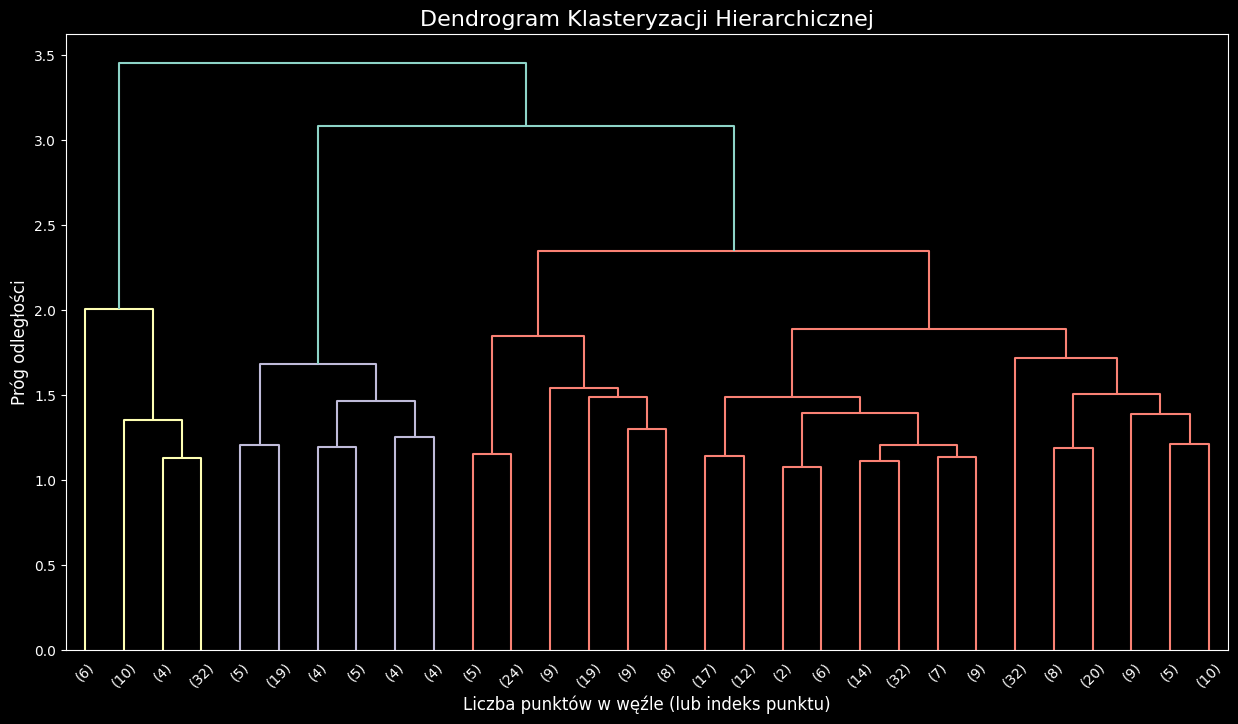


--- Krok 5: Szczegóły Klastrów ---

👑 SUPER-KLASTER: Content Marketing Seo (33 URL-i)
  ├── 🌿 Content Marketing Seo - Pisanie Internetowe Treści (8 URL-i)
  │   ├── https://www.senuto.com/pl/blog/jak-zostac-copywriterem
  │   ├── https://www.senuto.com/pl/blog/seo/seo-copywriting
  │   ├── https://www.senuto.com/pl/blog/webwriting
  │   ├── https://www.senuto.com/pl/blog/copywriter-jak-zaczac-pracowac-na-wlasny-rachunek
  │   └── https://www.senuto.com/pl/blog/copywriter-content-writer-seo-copywriter
  ├── 🌿 Content Marketing Seo - Marketing Treści Seo (9 URL-i)
  │   ├── https://www.senuto.com/pl/blog/przepis-na-zwiazek-idealny-content-marketing-i-seo
  │   ├── https://www.senuto.com/pl/blog/jestem-content-managerem-po-co-mi-senuto
  │   ├── https://www.senuto.com/pl/blog/ux-writing-a-content
  │   ├── https://www.senuto.com/pl/blog/content-marketing/page/4
  │   └── https://www.senuto.com/pl/blog/content-marketing-wszystko-co-musisz-wiedziec-aby-zaczac
  └── 🌿 Content Marketing Seo 

In [ ]:
# Krok 1: Instalacja i import potrzebnych bibliotek
!pip install pandas==2.2.2 -q
!pip install -U -q google-generativeai scikit-learn hdbscan umap-learn tldextract

import os
import re
import glob
import json
import time
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

from scipy.cluster.hierarchy import linkage
import google.generativeai as genai
from google.colab import userdata
from google.api_core import retry
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer

try:
    import hdbscan
    HDBSCAN_AVAILABLE = True
except ImportError:
    HDBSCAN_AVAILABLE = False

from tqdm.auto import tqdm
tqdm.pandas()

import plotly.io as pio
pio.renderers.default = 'colab'
pio.templates.default = "plotly_dark"

print("✅ Biblioteki zainstalowane/dostępne.")

# ===== 🎛️ KONFIGURACJA PARAMETRÓW PRZEZ FORMULARZE GOOGLE COLAB =====
print("🎛️ ZAAWANSOWANA KONFIGURACJA KLASTERYZACJI")

# @markdown ## 🚀 KONFIGURACJA EMBEDDINGÓW
REGENERATE_EMBEDDINGS = True #@param {type:"boolean"}
GEMINI_API_KEY = "" #@param {type:"string"}
EMBEDDING_SOURCE = "main_content" #@param ["main_content", "content", "title", "meta_description", "title,meta_description", "combined"]
EMBEDDING_MODEL = "models/text-embedding-004" #@param ["models/embedding-001", "models/text-embedding-004"]
TASK_TYPE = "clustering" #@param ["clustering", "semantic_similarity", "classification", "retrieval_query", "retrieval_document"]

# @markdown ## 🎯 TRYB KLASTERYZACJI
TRYB_KLASTERYZACJI = "Hierarchiczna" #@param ["Płaska", "Hierarchiczna"]
# @markdown ### Parametry dla trybu 'Płaska'
AUTO_DETERMINE_CLUSTERS = True #@param {type:"boolean"}
MANUAL_CLUSTERS = 15 #@param {type:"slider", min:2, max:50, step:1}
CLUSTER_RANGE_MIN = 5 #@param {type:"slider", min:2, max:20, step:1}
CLUSTER_RANGE_MAX = 25 #@param {type:"slider", min:10, max:50, step:1}
# @markdown ### Parametry dla trybu 'Hierarchiczna'
NUM_SUPER_CLUSTERS = 7 #@param {type:"slider", min:3, max:15, step:1}

# @markdown ## 📊 PARAMETRY WIZUALIZACJI I ZAPISU
VISUALIZATION_METHODS = ["TSNE", "PCA"] #@param {type:"raw"}
RANDOM_STATE = 42 #@param {type:"number"}
SHOW_DENDROGRAM = True #@param {type:"boolean"}
SAVE_VISUALIZATIONS = True #@param {type:"boolean"}
SHOW_CLUSTER_DETAILS = True #@param {type:"boolean"}
URLS_TO_SHOW_IN_CONSOLE = 5 #@param {type:"slider", min:3, max:25, step:1}
SAVE_DETAILED_RESULTS = True #@param {type:"boolean"}

# @markdown ## 🏷️ PARAMETRY NAZW KLASTRÓW
GENERATE_CLUSTER_NAMES = True #@param {type:"boolean"}
CLUSTER_NAMING_METHOD = "LLM (Gemini)" #@param ["LLM (Gemini)", "TF-IDF"]
LLM_NAMING_MODEL = "gemini-1.5-flash-latest" #@param {type:"string"}
MAX_CLUSTER_NAME_WORDS = 3 #@param {type:"slider", min:1, max:6, step:1}


# ===== FUNKCJE POMOCNICZE =====

def configure_gemini_api(api_key_param):
    if not (REGENERATE_EMBEDDINGS or CLUSTER_NAMING_METHOD == 'LLM (Gemini)'): return False
    try:
        api_key = api_key_param
        if not api_key:
            secret_names = ['SECRET_GEMINI_API_KEY', 'GEMINI_API_KEY', 'API_KEY', 'GOOGLE_API_KEY']
            for name in secret_names:
                try:
                    api_key = userdata.get(name)
                    if api_key: print(f"✅ Klucz API pomyślnie pobrano z Colab secret: '{name}'"); break
                except userdata.SecretNotFoundError: continue
        if not api_key: raise ValueError(f"Nie znaleziono klucza API.")
        genai.configure(api_key=api_key)
        return True
    except Exception as e:
        print(f"❌ Błąd konfiguracji API: {e}"); return False

@retry.Retry(timeout=300.0)
def generate_embeddings_in_batches(texts: list[str], model: str, task_type: str, batch_size: int = 100) -> list:
    all_embeddings = []
    for i in tqdm(range(0, len(texts), batch_size), desc="Generowanie embeddingów"):
        batch_texts = [str(t) if pd.notna(t) else "" for t in texts[i: i + batch_size]]
        try:
            result = genai.embed_content(model=model, content=batch_texts, task_type=task_type)
            all_embeddings.extend(result['embedding'])
        except Exception as e:
            print(f"⚠️ Błąd w paczce {i//batch_size}: {e}."); all_embeddings.extend([None] * len(batch_texts))
    return all_embeddings

def prepare_text_for_embedding(row, source_type):
    parts = []
    source_map = {"title,meta_description": ["title", "meta_description"], "combined": ["title", "meta_description", "content", "main_content"]}
    cols = source_map.get(source_type, [source_type])
    for col in cols: parts.append(str(row.get(col, '')))
    return re.sub(r'\s+', ' ', ' '.join(filter(None, parts)).replace('\n', ' ')).strip()

def load_and_prepare_data(config):
    print("\n📂 Krok 1: Wczytanie i przygotowanie danych...")
    file_pattern = re.compile(r'^multithreaded_crawl_results_\d{8}_\d{6}\.csv$')
    source_files = [f for f in glob.glob("*.csv") if file_pattern.match(os.path.basename(f))]
    if not source_files: raise FileNotFoundError("Nie znaleziono pliku pasującego do wzorca 'multithreaded_crawl_results_YYYYMMDD_HHMMSS.csv'.")
    data_file = max(source_files, key=os.path.getmtime)
    print(f"✅ Używam pliku źródłowego: {data_file}")
    df = pd.read_csv(data_file)
    print(f"📈 Wczytano {len(df)} rekordów.")
    df['text_for_embedding'] = df.apply(lambda row: prepare_text_for_embedding(row, config['EMBEDDING_SOURCE']), axis=1)
    df['text_for_naming'] = df.apply(lambda row: prepare_text_for_embedding(row, 'title,meta_description'), axis=1)
    df.dropna(subset=['text_for_embedding'], inplace=True)
    df = df[df['text_for_embedding'].str.strip().str.len() > 20].reset_index(drop=True)
    if df.empty: raise ValueError("Po czyszczeniu nie ma żadnych rekordów z wystarczającą ilością tekstu.")
    print(f"📊 Po czyszczeniu zostało {len(df)} rekordów gotowych do analizy.")
    return df

def get_or_generate_embeddings(df, config):
    print(f"\n🧠 Krok 2: Generowanie embeddingów...")
    if not configure_gemini_api(config['GEMINI_API_KEY']): raise ConnectionError("API nie skonfigurowane.")
    embeddings_list = generate_embeddings_in_batches(df['text_for_embedding'].tolist(), config['EMBEDDING_MODEL'], config['TASK_TYPE'])
    valid_indices = [i for i, emb in enumerate(embeddings_list) if emb is not None]
    df, embeddings = df.iloc[valid_indices].copy().reset_index(drop=True), np.array([embeddings_list[i] for i in valid_indices], dtype=np.float32)
    if embeddings.size == 0: raise ValueError("Nie udało się pozyskać żadnych embeddingów.")
    embeddings /= np.linalg.norm(embeddings, axis=1, keepdims=True)
    print(f"✅ Pozyskano i znormalizowano {len(embeddings)} embeddingów.")
    return df, embeddings

def determine_optimal_clusters(embeddings, min_k, max_k, random_state, is_sub_cluster=False):
    prefix = "   ->" if is_sub_cluster else ""
    print(f"{prefix}🔍 Szukanie optymalnej liczby klastrów ({min_k}-{max_k})...")
    if len(embeddings) < min_k: return 1
    cluster_range = range(min_k, min(max_k + 1, len(embeddings)))
    if len(cluster_range) < 2: return 1
    scores = []
    for k in tqdm(cluster_range, desc=f"{prefix}Testowanie K", leave=False):
        kmeans = KMeans(n_clusters=k, random_state=random_state, n_init='auto').fit(embeddings)
        if len(np.unique(kmeans.labels_)) > 1:
            scores.append(silhouette_score(embeddings, kmeans.labels_))
        else:
            scores.append(-1)
    if all(s == -1 for s in scores):
        optimal_k = 1
    else:
        optimal_k = cluster_range[np.argmax(scores)]
    print(f"{prefix}🎯 Optymalna liczba klastrów (wg Silhouette Score): {optimal_k}")
    return optimal_k

@retry.Retry(timeout=60.0)
def generate_cluster_name_with_llm(texts, model_name, max_words):
    sample = "\n- ".join(texts[:15])
    prompt = f"Na podstawie poniższej listy tytułów/opisów, wygeneruj zwięzłą, {max_words}-słowną nazwę dla tej grupy w języku polskim.\n\nPrzykłady:\n- {sample}\n\nWygeneruj tylko nazwę grupy, bez wyjaśnień."
    model = genai.GenerativeModel(model_name)
    response = model.generate_content(prompt)
    return response.text.strip().title()

def get_cluster_names(df, labels, config, name_for):
    print(f"🏷️ Generowanie nazw dla {name_for}...")
    names = {}
    for cid in tqdm(np.unique(labels), desc=f"Nazywanie {name_for}", leave=False):
        if cid == -1: continue
        cluster_texts = df[labels == cid]['text_for_naming'].tolist()
        if not cluster_texts: names[cid] = f"Klaster {cid}"; continue
        if config['CLUSTER_NAMING_METHOD'] == 'LLM (Gemini)':
            names[cid] = generate_cluster_name_with_llm(cluster_texts, config['LLM_NAMING_MODEL'], config['MAX_CLUSTER_NAME_WORDS'])
        else: # Tu można dodać logikę TF-IDF
            pass
    return names

def plot_and_save(fig, base_filename, viz_dir, config):
    fig.show()
    if config['SAVE_VISUALIZATIONS']:
        safe_filename = re.sub(r'[^\w\s-]', '', base_filename).strip().replace(' ', '_')
        html_path = os.path.join(viz_dir, f"{safe_filename}.html")
        try:
            fig.write_html(html_path)
            print(f"    -> Zapisano interaktywną wizualizację: {html_path}")
        except Exception as e:
            print(f"    ⚠️ Nie udało się zapisać wizualizacji '{base_filename}': {e}")

def plot_dendrogram(embeddings, viz_dir, config):
    print("\n--- Krok Wizualizacji: Tworzenie Dendrogramu ---")
    plt.style.use('dark_background')
    plt.figure(figsize=(15, 8))
    plt.title("Dendrogram Klasteryzacji Hierarchicznej", fontsize=16)
    linked = linkage(embeddings, method='ward')
    dendrogram(linked, orientation='top', truncate_mode='lastp', p=30, show_leaf_counts=True)
    plt.xlabel("Liczba punktów w węźle (lub indeks punktu)", fontsize=12)
    plt.ylabel("Próg odległości", fontsize=12)

    if config['SAVE_VISUALIZATIONS']:
        filepath = os.path.join(viz_dir, "dendrogram_hierarchii.png")
        plt.savefig(filepath, dpi=150, bbox_inches='tight')
        print(f"    -> Zapisano dendrogram: {filepath}")

    plt.show()

def run_flat_clustering(df, embeddings, config):
    print("\n--- Krok 3: Uruchamianie Klasteryzacji Płaskiej ---")
    if config['AUTO_DETERMINE_CLUSTERS']:
        n_clusters = determine_optimal_clusters(embeddings, config['CLUSTER_RANGE_MIN'], config['CLUSTER_RANGE_MAX'], config['RANDOM_STATE'])
    else:
        n_clusters = config['MANUAL_CLUSTERS']
    kmeans = KMeans(n_clusters=n_clusters, random_state=config['RANDOM_STATE'], n_init='auto').fit(embeddings)
    df['final_cluster_id'] = kmeans.labels_.astype(str)
    if config['GENERATE_CLUSTER_NAMES']:
        cluster_names = get_cluster_names(df, kmeans.labels_, config, "klastrów")
        df['final_cluster_name'] = df['final_cluster_id'].astype(int).map(cluster_names)
    else:
        df['final_cluster_name'] = "Klaster " + df['final_cluster_id']
    return df

def run_hierarchical_clustering(df, embeddings, config):
    print("\n--- Krok 3: Uruchamianie Klasteryzacji Hierarchicznej ---")
    print(f"👑 Poziom 1: Szukanie {config['NUM_SUPER_CLUSTERS']} super-klastrów...")
    super_kmeans = KMeans(n_clusters=config['NUM_SUPER_CLUSTERS'], random_state=config['RANDOM_STATE'], n_init='auto').fit(embeddings)
    super_cluster_names = get_cluster_names(df, super_kmeans.labels_, config, "Super-Klastrów")

    df['super_cluster_id'] = super_kmeans.labels_
    df['super_cluster_name'] = df['super_cluster_id'].map(super_cluster_names)

    all_sub_labels = np.zeros_like(super_kmeans.labels_)
    final_names_map = {}

    print("\n🌿 Poziom 2: Szukanie sub-klastrów...")
    for super_id, super_name in super_cluster_names.items():
        mask = (super_kmeans.labels_ == super_id)
        if not np.any(mask): continue

        cluster_embeddings = embeddings[mask]
        print(f"\nProcessing Super-Klaster {super_id}: '{super_name}' ({len(cluster_embeddings)} elementów)")

        if len(cluster_embeddings) < 10:
            n_sub_clusters = 1
        else:
            n_sub_clusters = determine_optimal_clusters(cluster_embeddings, 2, 8, config['RANDOM_STATE'], is_sub_cluster=True)

        if n_sub_clusters == 1:
            sub_labels = np.zeros(len(cluster_embeddings), dtype=int)
            final_names_map[f"{super_id}.0"] = super_name
        else:
            sub_kmeans = KMeans(n_clusters=n_sub_clusters, random_state=config['RANDOM_STATE'], n_init='auto').fit(cluster_embeddings)
            sub_labels = sub_kmeans.labels_
            sub_names = get_cluster_names(df[mask], sub_labels, config, f"Sub-Klastrów w '{super_name}'")
            for sub_id, sub_name in sub_names.items():
                final_names_map[f"{super_id}.{sub_id}"] = f"{super_name} - {sub_name}"

        all_sub_labels[mask] = sub_labels

    df['final_cluster_id'] = [f"{s}.{sub}" for s, sub in zip(super_kmeans.labels_, all_sub_labels)]
    df['final_cluster_name'] = df['final_cluster_id'].map(final_names_map)
    df['sub_cluster_id'] = all_sub_labels
    return df

def report_cluster_details(df, config): # <--- POPRAWIONA FUNKCJA RAPORTUJĄCA
    print("\n--- Krok 5: Szczegóły Klastrów ---")
    if 'super_cluster_id' not in df.columns: # Obsługa trybu płaskiego
        for name, group in sorted(df.groupby('final_cluster_name'), key=lambda item: item[0]):
            print(f"\n⭐ KLASTER: {name} ({len(group)} URL-i)")
            for _, row in group.head(config['URLS_TO_SHOW_IN_CONSOLE']).iterrows():
                print(f"  - {row['url']}")
        return

    # Obsługa trybu hierarchicznego
    for sid, s_name in sorted(df.groupby('super_cluster_id')['super_cluster_name'].first().items()):
        super_cluster_df = df[df['super_cluster_id'] == sid]
        print(f"\n👑 SUPER-KLASTER: {s_name} ({len(super_cluster_df)} URL-i)")

        sub_groups = sorted(super_cluster_df.groupby('sub_cluster_id'), key=lambda item: item[0])
        num_sub_groups = len(sub_groups)

        for i, (sub_id, sub_df) in enumerate(sub_groups):
            final_name = sub_df['final_cluster_name'].iloc[0]
            prefix = "└──" if i == num_sub_groups - 1 else "├──"
            print(f"  {prefix} 🌿 {final_name} ({len(sub_df)} URL-i)")

            urls_to_show = sub_df.head(config['URLS_TO_SHOW_IN_CONSOLE'])
            for j, (_, row) in enumerate(urls_to_show.iterrows()):
                line_prefix = "    " if i == num_sub_groups - 1 else "│   "
                url_prefix = "└──" if j == len(urls_to_show) - 1 else "├──"
                print(f"  {line_prefix}{url_prefix} {row['url']}")

def main():
    try:
        config = {k: v for k, v in globals().items() if k.isupper()}
        timestamp = int(time.time())
        viz_dir = f"wizualizacje_{timestamp}"
        if config['SAVE_VISUALIZATIONS'] and not os.path.exists(viz_dir):
            os.makedirs(viz_dir)
            print(f"🖼️ Wizualizacje będą zapisywane w folderze: ./{viz_dir}/")

        df = load_and_prepare_data(config)
        df, embeddings = get_or_generate_embeddings(df, config)

        if config['TRYB_KLASTERYZACJI'] == 'Hierarchiczna':
            df = run_hierarchical_clustering(df, embeddings, config)
        else:
            df = run_flat_clustering(df, embeddings, config)

        print("\n--- Krok 4: Generowanie Wizualizacji ---")
        for method in config['VISUALIZATION_METHODS']:
            print(f"🎨 Tworzę wizualizację: {method}")
            reducer = TSNE(n_components=2, random_state=config['RANDOM_STATE']) if method == 'TSNE' else PCA(n_components=2, random_state=config['RANDOM_STATE'])
            coords = reducer.fit_transform(embeddings)
            df[f'{method.lower()}_x'], df[f'{method.lower()}_y'] = coords[:,0], coords[:,1]
            fig = px.scatter(df, x=f'{method.lower()}_x', y=f'{method.lower()}_y', color='final_cluster_name', hover_data=['url', 'title'])
            fig.update_layout(title=f"Wizualizacja Klastrów ({method})")
            plot_and_save(fig, f"wizualizacja_klastrow_{method}", viz_dir, config)

        if config['SHOW_DENDROGRAM']:
            plot_dendrogram(embeddings, viz_dir, config)

        if config['SHOW_CLUSTER_DETAILS']:
            report_cluster_details(df, config)

        if config['SAVE_DETAILED_RESULTS']:
            output_filename = f"advanced_clustering_results_{timestamp}.csv"
            df[f"metadata_embedding_gemini"] = [json.dumps(e.tolist()) for e in embeddings]
            cols_to_save = ['url', 'title', 'meta_description', 'main_content', 'final_cluster_id', 'final_cluster_name', 'metadata_embedding_gemini']
            existing_cols = [c for c in cols_to_save if c in df.columns]
            df[existing_cols].to_csv(output_filename, index=False)
            print(f"\n💾 Wyniki zapisano do pliku: {output_filename}")

    except Exception as e:
        print(f"\n❌ BŁĄD KRYTYCZNY: {e}"); import traceback; traceback.print_exc()

if __name__ == "__main__":
    main()

## 🌟 Obliczanie Site Focus i Site Radius


### Kluczowe Metryki Generowane przez Skrypt:

Skrypt oblicza i raportuje następujące metryki dla każdej strony i domeny:

*   **`SiteRadius` (dla każdej strony):**
    *   Jest to **odległość kosinusowa** (miara podobieństwa) embeddingu danej strony od **centroidu (środka tematycznego)** jej własnej domeny.
    *   **Interpretacja:** Niższa wartość `SiteRadius` oznacza, że dana strona jest tematycznie bliżej głównego, centralnego tematu swojej domeny. Strony z niskim `SiteRadius` są uważane za "serce tematyczne" domeny.

*   **`AvgSiteRadius` (dla każdej domeny):**
    *   Jest to **średnia wartość `SiteRadius`** dla wszystkich stron w danej domenie.
    *   **Interpretacja:** Niższa wartość `AvgSiteRadius` dla domeny oznacza, że wszystkie strony w tej domenie są, średnio, bliżej jej centrum tematycznego, co świadczy o wyższej spójności tematycznej.

*   **`DomainFocus` (dla każdej domeny):**
    *   Jest to wskaźnik **spójności tematycznej domeny**, obliczany jako `1 / (1 + AvgSiteRadius)`.
    *   **Interpretacja:** Wyższa wartość `DomainFocus` oznacza, że strony w domenie są silniej skupione wokół głównego tematu, co sugeruje wysoką eksperckość i autorytet w tej dziedzinie. Jest to kluczowy wskaźnik Topical Authority w kontekście spójności. Im bliżej 1, tym lepiej.


### Konfiguracja Parametrów (Formularze Colab)

Poniższa komórka kodowa zawiera **formularze interaktywne**, które pozwalają na łatwą konfigurację zachowania skryptu bez edycji kodu. Po prostu wybierz odpowiednie opcje lub wprowadź wartości.

#### 📂 Źródło Danych i Nazwy Kolumn
*   **`URL_COLUMN`**: Nazwa kolumny zawierającej adresy URL w Twoim pliku CSV. Domyślnie `url`.

#### 🧠 Konfiguracja Embeddingów
*   **`EMBEDDING_SOURCE_COLUMN`**: Kolumna, z której skrypt spróbuje wczytać już istniejące embeddingi (np. `metadata_embedding_gemini`). To jest **domyślna i zalecana** opcja, jeśli plik z klasteryzacji zawiera embeddingi.
*   **`REGENERATE_EMBEDDINGS`**: Jeśli `True`, skrypt zignoruje istniejące embeddingi i wygeneruje nowe. **Pamiętaj, że to wymaga aktywnego klucza API Gemini i może zająć dużo czasu/zużyć tokeny!**
*   **`EMBEDDING_TEXT_SOURCE`**: **Używane tylko, gdy `REGENERATE_EMBEDDINGS` jest `True`**. Określa, które kolumny z pliku CSV (np. `title,meta_description` lub `main_content`) mają być użyte do ponownego generowania embeddingów.
*   **`GEMINI_API_KEY`**: Tutaj możesz opcjonalnie wkleić swój klucz API. **Zaleca się jednak używanie Colab Secrets**, pozostawiając to pole puste.

#### 📈 Parametry Raportowania i Wizualizacji
*   **`SAVE_VISUALIZATIONS`**: Jeśli `True`, interaktywne wykresy Plotly (HTML) zostaną zapisane w nowo utworzonym folderze `wizualizacje_TIMESTAMP` w bieżącym katalogu Colab.
*   **`GENERATE_DOMAIN_MAPS`**: Jeśli `True`, skrypt stworzy szczegółowe wizualizacje (t-SNE i Polar) dla **każdej z 5 domen** o największej liczbie stron, pokazując ich spójność tematyczną względem własnego centroidu.
*   **`TOP_N_RANKING`**: Ile "najbliższych" i "najdalszych" URL-i ma być wyświetlonych w konsoli dla każdej domeny, na podstawie `SiteRadius`.

---

### III. Przebieg Działania Skryptu

Po uruchomieniu komórki, skrypt wykona następujące kroki:

1.  **Instalacja Bibliotek:** Zapewni, że wszystkie wymagane biblioteki są zainstalowane i zaktualizowane.
2.  **Wczytanie Danych:** Wczyta najnowszy plik CSV z wynikami klasteryzacji. Sprawdzi obecność kolumny URL i wygeneruje nazwy domen z URL-i.
3.  **Pozyskiwanie Embeddingów:**
    *   Domyślnie: Spróbuje wczytać istniejące embeddingi z kolumny określonej w `EMBEDDING_SOURCE_COLUMN`.
    *   Jeśli `REGENERATE_EMBEDDINGS` jest `True`: Skonfiguruje API Gemini i wygeneruje nowe embeddingi na podstawie tekstu z `EMBEDDING_TEXT_SOURCE`.
4.  **Obliczanie Centroidów Domen:** Dla każdej domeny obliczy jej "centroid" - średni wektor embeddingowy wszystkich stron należących do tej domeny. Ten centroid reprezentuje główne, centralne pojęcie tematyczne domeny.
5.  **Obliczanie Odległości (`SiteRadius`):** Dla każdej strony obliczy odległość kosinusową jej własnego embeddingu od centroidu domeny, do której należy. Wynik zostanie zapisany w nowej kolumnie `SiteRadius`.
6.  **Agregacja Metryk i Rankingi:**
    *   Obliczy `AvgSiteRadius` i `DomainFocus` dla każdej domeny.
    *   Wyświetli tabelę podsumowującą te metryki dla wszystkich domen, posortowaną według `DomainFocus`.
    *   Dla każdej domeny wyświetli ranking `TOP_N_RANKING` stron najbliżej (najbardziej "w temacie") i najdalej (najmniej "w temacie") od jej centroidu.
7.  **Wizualizacje Ogólne:** Wygeneruje wykres punktowy Plotly pokazujący `AvgSiteRadius` vs `DomainFocus` dla wszystkich domen, co pozwala na szybką ocenę ich spójności tematycznej.
8.  **Szczegółowe Mapy Domen (opcjonalnie):** Jeśli `GENERATE_DOMAIN_MAPS` jest `True`, stworzy wizualizacje t-SNE i polarne dla wybranych domen, obrazujące, jak poszczególne strony rozkładają się wokół centrum tematycznego swojej domeny.
9.  **Zapis Wyników:** Wszystkie oryginalne dane, wraz z nowo obliczonymi metrykami (`SiteRadius`, `AvgSiteRadius`, `DomainFocus`), zostaną zapisane do nowego pliku CSV (`topical_authority_domain_results_TIMESTAMP.csv`) w bieżącym katalogu Colab.

Monitoruj postęp działania skryptu poprzez komunikaty w konsoli i paski postępu (`tqdm`).

In [ ]:
# Krok 1: Instalacja i import potrzebnych bibliotek
!pip install pandas==2.2.2 -q
!pip install -U -q google-generativeai scikit-learn tldextract kaleido

import os
import re
import glob
import json
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

import tldextract
import google.generativeai as genai
from google.colab import userdata
from google.api_core import retry
from scipy.spatial.distance import cosine
from sklearn.manifold import TSNE

# Ustawienie renderera i motywu dla Plotly, aby działał w Colab
import plotly.io as pio
pio.renderers.default = 'colab'
pio.templates.default = "plotly_dark"

tqdm.pandas()
print("✅ Biblioteki zainstalowane/dostępne.")

# ===== 🎛️ KONFIGURACJA PARAMETRÓW =====
print("🎛️ KONFIGURACJA SKRYPTU DO OBLICZANIA TOPICAL AUTHORITY (dla Domen)")

# @markdown ## 📂 ŹRÓDŁO DANYCH I NAZWY KOLUMN
URL_COLUMN = "url" #@param {type:"string"}

# @markdown ## 🧠 KONFIGURACJA EMBEDDINGÓW
EMBEDDING_SOURCE_COLUMN = "metadata_embedding_gemini" #@param ["metadata_embedding_gemini", "content_embedding_gemini"]
REGENERATE_EMBEDDINGS = False #@param {type:"boolean"}
EMBEDDING_TEXT_SOURCE = "title,meta_description" #@param {type:"string"}
GEMINI_API_KEY = "" #@param {type:"string"}

# @markdown ## 📈 PARAMETRY RAPORTOWANIA I WIZUALIZACJI
SAVE_VISUALIZATIONS = True #@param {type:"boolean"}
GENERATE_DOMAIN_MAPS = True #@param {type:"boolean"}
TOP_N_RANKING = 10 #@param {type:"slider", min:3, max:20, step:1}

EMBEDDING_MODEL = "models/text-embedding-004"
TASK_TYPE = "SEMANTIC_SIMILARITY"

# ===== FUNKCJE POMOCNICZE =====

def configure_gemini_api(api_key_param):
    if not REGENERATE_EMBEDDINGS: return False
    try:
        api_key = api_key_param
        if not api_key:
            secret_names = ['SECRET_GEMINI_API_KEY', 'GEMINI_API_KEY', 'API_KEY', 'GOOGLE_API_KEY']
            for name in secret_names:
                try:
                    api_key = userdata.get(name)
                    if api_key: print(f"✅ Klucz API pomyślnie pobrano z Colab secret: '{name}'"); break
                except userdata.SecretNotFoundError: continue
        if not api_key: raise ValueError(f"Nie znaleziono klucza API.")
        genai.configure(api_key=api_key)
        return True
    except Exception as e:
        print(f"❌ Błąd konfiguracji API: {e}"); return False

@retry.Retry(timeout=300.0)
def generate_embeddings_in_batches(texts: list[str], model: str, task_type: str, batch_size: int = 100) -> list:
    all_embeddings = []
    for i in tqdm(range(0, len(texts), batch_size), desc="Generowanie embeddingów"):
        batch_texts = [str(t) if pd.notna(t) else "" for t in texts[i: i + batch_size]]
        try:
            result = genai.embed_content(model=model, content=batch_texts, task_type=task_type)
            all_embeddings.extend(result['embedding'])
        except Exception as e:
            print(f"⚠️ Błąd w paczce {i//batch_size}: {e}."); all_embeddings.extend([None] * len(batch_texts))
    return all_embeddings

def load_and_prepare_data(config):
    print("\n📂 Krok 1: Wczytanie i przygotowanie danych...")
    all_files = glob.glob("*clustering_results_*.csv")
    if not all_files:
        raise FileNotFoundError("Nie znaleziono żadnych plików `...clustering_results_...csv`.")
    file_path = max(all_files, key=os.path.getmtime)
    print(f"✅ Wybrano najnowszy plik z wynikami: {file_path}")

    df = pd.read_csv(file_path)
    print(f"📈 Wczytano {len(df)} rekordów.")
    if config['URL_COLUMN'] not in df.columns:
        raise ValueError(f"Brak wymaganej kolumny URL '{config['URL_COLUMN']}' w pliku '{file_path}'.")
    df['domain'] = df[config['URL_COLUMN']].progress_apply(lambda u: tldextract.extract(u).registered_domain if isinstance(u, str) else None)
    df.dropna(subset=['domain'], inplace=True)
    cluster_id_col = next((col for col in df.columns if 'cluster_id' in col), None)
    if cluster_id_col:
        df = df[df[cluster_id_col] != -1]
    df = df.reset_index(drop=True)
    print(f"📊 Po czyszczeniu zostało {len(df)} rekordów z {df['domain'].nunique()} domen.")
    return df

def get_or_generate_embeddings(df, config):
    print(f"\n🧠 Krok 2: Pozyskiwanie embeddingów...")
    embeddings = np.array([])
    if config['REGENERATE_EMBEDDINGS']:
        if not configure_gemini_api(config['GEMINI_API_KEY']): raise ConnectionError("API nie skonfigurowane.")
        source_cols = [c.strip() for c in config['EMBEDDING_TEXT_SOURCE'].split(',')]
        missing_cols = [c for c in source_cols if c not in df.columns]
        if missing_cols: raise ValueError(f"Brak kolumn {missing_cols} do regeneracji embeddingów.")
        df['text_for_embedding'] = df[source_cols].fillna('').agg(' '.join, axis=1)
        embeddings_list = generate_embeddings_in_batches(df['text_for_embedding'].tolist(), EMBEDDING_MODEL, TASK_TYPE)
        valid_indices = [i for i, emb in enumerate(embeddings_list) if emb is not None]
        df = df.iloc[valid_indices].copy().reset_index(drop=True)
        embeddings = np.array([embeddings_list[i] for i in valid_indices], dtype=np.float32)
    else:
        embedding_col = config['EMBEDDING_SOURCE_COLUMN']
        print(f"📁 Tryb: Wczytywanie istniejących embeddingów z kolumny: '{embedding_col}'")
        if embedding_col not in df.columns: raise ValueError(f"Wybrana kolumna '{embedding_col}' nie istnieje w pliku.")
        def parse_embedding(x):
            if isinstance(x, str) and x.startswith('['):
                try: return json.loads(x)
                except json.JSONDecodeError: return None
            return None
        df['embedding_loaded'] = df[embedding_col].progress_apply(parse_embedding)
        df.dropna(subset=['embedding_loaded'], inplace=True)
        if df.empty: raise ValueError(f"Nie znaleziono prawidłowych embeddingów w kolumnie '{embedding_col}'.")
        embeddings = np.array(df['embedding_loaded'].tolist(), dtype=np.float32)

    if embeddings.size == 0: raise ValueError("Nie udało się pozyskać embeddingów.")
    embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)
    print(f"✅ Pozyskano i znormalizowano {len(embeddings)} embeddingów.")

    # --- KLUCZOWA POPRAWKA ---
    return df, embeddings

def calculate_centroids(df, embeddings, group_by_col):
    print(f"🧭 Obliczanie centroidów dla grup w kolumnie '{group_by_col}'...")
    embedding_map = {index: i for i, index in enumerate(df.index)}
    centroids = {}
    for group_name, group_df in tqdm(df.groupby(group_by_col), desc=f"Przetwarzanie grup '{group_by_col}'"):
        group_indices = [embedding_map[i] for i in group_df.index if i in embedding_map]
        if group_indices: centroids[group_name] = np.mean(embeddings[group_indices], axis=0)
    print(f"✅ Obliczono {len(centroids)} centroidów.")
    return centroids

def calculate_distances(df, embeddings, domain_centroids, config):
    print("📏 Obliczanie odległości od centroidów domen...")
    embedding_map = {index: i for i, index in enumerate(df.index)}
    results = []
    for index, row in tqdm(df.iterrows(), total=len(df), desc="Mierzenie odległości"):
        emb_idx, domain = embedding_map.get(index), row['domain']
        if emb_idx is None: continue
        page_emb = embeddings[emb_idx]
        dist_domain = cosine(page_emb, domain_centroids[domain]) if domain in domain_centroids else np.nan
        results.append({'SiteRadius': dist_domain})
    return pd.concat([df, pd.DataFrame(results, index=df.index)], axis=1)

def report_domain_rankings(df, top_n, config):
    print(f"\n--- Rankingi stron dla każdej domeny ---")
    for domain_name, group_df in df.groupby('domain'):
        if len(group_df) < top_n: continue
        print(f"\n⭐ Domena: '{domain_name}'")
        closest = group_df.nsmallest(top_n, 'SiteRadius')
        print(f"  🎯 NAJBLIŻEJ CENTRUM (serce tematyczne domeny):")
        for _, row in closest.iterrows(): print(f"    - [{row['SiteRadius']:.4f}] {row[config['URL_COLUMN']]}")
        if len(group_df) >= top_n * 2:
            farthest = group_df.nlargest(top_n, 'SiteRadius')
            print(f"  🛰️ NAJDALEJ OD CENTRUM (peryferie tematyczne):")
            for _, row in farthest.iterrows(): print(f"    - [{row['SiteRadius']:.4f}] {row[config['URL_COLUMN']]}")

def plot_and_save(fig, title, viz_dir, config):
    fig.show()
    if config['SAVE_VISUALIZATIONS']:
        safe_title = re.sub(r'[^\w\s-]', '', title).strip().replace(' ', '_')
        filepath_html = os.path.join(viz_dir, f"{safe_title}.html")
        try:
            fig.write_html(filepath_html)
            print(f"    -> Zapisano interaktywną wizualizację: {filepath_html}")
        except Exception as e:
            print(f"    ⚠️ Nie udało się zapisać wizualizacji dla '{title}': {e}")

def plot_domain_visualizations(embeddings, page_urls, distances, centroid, title, viz_dir, config):
    if len(embeddings) < 5:
        print(f"⚠️ Pomijam wizualizacje dla '{title}' - za mało punktów ({len(embeddings)}).")
        return

    # 2D t-SNE
    combined_emb_2d = np.vstack([embeddings, centroid])
    coords_2d = TSNE(n_components=2, random_state=42, perplexity=min(30, len(embeddings)-1)).fit_transform(combined_emb_2d)
    pages_2d, centroid_2d = coords_2d[:-1], coords_2d[-1]
    fig_2d = go.Figure()
    fig_2d.add_trace(go.Scatter(x=pages_2d[:, 0], y=pages_2d[:, 1], mode='markers', hovertext=page_urls, hoverinfo='text', marker=dict(color=distances, colorscale='RdYlGn_r', showscale=True, colorbar=dict(title='Odległość')), name='Strony'))
    fig_2d.add_trace(go.Scatter(x=[centroid_2d[0]], y=[centroid_2d[1]], mode='markers', marker=dict(symbol='star', color='blue', size=15, line=dict(color='black', width=1)), name='Centrum Domeny'))
    fig_2d.update_layout(title=f'Wizualizacja t-SNE dla: {title}', xaxis_title='x', yaxis_title='y')
    plot_and_save(fig_2d, f"tsne_2d_{title}", viz_dir, config)

    # Polar
    angles = np.linspace(0, 360, len(distances), endpoint=False)
    fig_polar = px.scatter_polar(r=distances, theta=angles, color=distances, hover_name=page_urls, color_continuous_scale="RdYlGn_r", title=f"Wizualizacja Polarna dla: {title}", labels={"r": "Odległość od centrum", "color": "Odległość"})
    plot_and_save(fig_polar, f"polar_{title}", viz_dir, config)

def main():
    try:
        config = {k: v for k, v in globals().items() if k.isupper()}
        timestamp = int(time.time())
        viz_dir = None
        if config['SAVE_VISUALIZATIONS']:
            viz_dir = f"wizualizacje_{timestamp}"
            if not os.path.exists(viz_dir): os.makedirs(viz_dir)
            print(f"🖼️ Wizualizacje będą zapisywane w folderze: ./{viz_dir}/")

        df = load_and_prepare_data(config)
        df, embeddings = get_or_generate_embeddings(df, config)

        print("\n--- Krok 3: Obliczanie Centroidów Domen ---")
        domain_centroids = calculate_centroids(df, embeddings, 'domain')

        print("\n--- Krok 4: Obliczanie Odległości ---")
        df = calculate_distances(df, embeddings, domain_centroids, config)

        print("\n--- Krok 5: Agregacja Metryk i Rankingi ---")
        print("\n📊 ZBIORCZE METRYKI DLA DOMEN:")
        domain_metrics = df.groupby('domain').agg(AvgSiteRadius=('SiteRadius', 'mean'), PageCount=(config['URL_COLUMN'], 'count')).reset_index()
        domain_metrics['DomainFocus'] = 1 / (1 + domain_metrics['AvgSiteRadius'])
        print(domain_metrics.sort_values('DomainFocus', ascending=False).to_string(index=False))

        report_domain_rankings(df, config['TOP_N_RANKING'], config)

        print("\n--- Krok 6: Główne Wizualizacje ---")
        fig1 = px.scatter(domain_metrics, x='AvgSiteRadius', y='DomainFocus', size='PageCount', color='PageCount', hover_data={'domain': True, 'PageCount': True, 'AvgSiteRadius': ':.3f', 'DomainFocus': ':.3f'}, text='domain', title='Mapa Spójności Domen (Focus vs Radius)')
        fig1.update_traces(textposition='top center')
        fig1.add_vline(x=domain_metrics.AvgSiteRadius.median(), line_dash="dash", opacity=0.5)
        fig1.add_hline(y=domain_metrics.DomainFocus.median(), line_dash="dash", opacity=0.5)
        plot_and_save(fig1, "mapa_spojnosci_domen", viz_dir, config)

        if config['GENERATE_DOMAIN_MAPS']:
            print("\n--- Krok 7: Szczegółowe Mapy dla Domen ---")
            embedding_map = {index: i for i, index in enumerate(df.index)}
            for domain_name in df['domain'].value_counts().nlargest(5).index:
                print(f"\n--- Tworzenie wizualizacji dla domeny: {domain_name} ---")
                domain_df = df[df['domain'] == domain_name]
                indices = [embedding_map[i] for i in domain_df.index]
                plot_domain_visualizations(embeddings[indices], domain_df[config['URL_COLUMN']].values, domain_df['SiteRadius'].values, domain_centroids[domain_name], domain_name, viz_dir, config)

        df = pd.merge(df, domain_metrics[['domain', 'DomainFocus', 'AvgSiteRadius']], on='domain', how='left')
        output_filename = f"topical_authority_domain_results_{timestamp}.csv"
        df.to_csv(output_filename, index=False)
        print(f"\n💾 Pełne wyniki zapisano do pliku: {output_filename}")

    except Exception as e:
        print(f"\n❌ BŁĄD KRYTYCZNY: {e}"); import traceback; traceback.print_exc()

if __name__ == "__main__":
    main()

✅ Biblioteki zainstalowane/dostępne.
🎛️ KONFIGURACJA SKRYPTU DO OBLICZANIA TOPICAL AUTHORITY (dla Domen)
🖼️ Wizualizacje będą zapisywane w folderze: ./wizualizacje_1749287586/

📂 Krok 1: Wczytanie i przygotowanie danych...
✅ Wybrano najnowszy plik z wynikami: advanced_clustering_results_1749287205.csv
📈 Wczytano 350 rekordów.


  0%|          | 0/350 [00:00<?, ?it/s]

📊 Po czyszczeniu zostało 350 rekordów z 1 domen.

🧠 Krok 2: Pozyskiwanie embeddingów...
📁 Tryb: Wczytywanie istniejących embeddingów z kolumny: 'metadata_embedding_gemini'


  0%|          | 0/350 [00:00<?, ?it/s]

✅ Pozyskano i znormalizowano 350 embeddingów.

--- Krok 3: Obliczanie Centroidów Domen ---
🧭 Obliczanie centroidów dla grup w kolumnie 'domain'...


Przetwarzanie grup 'domain':   0%|          | 0/1 [00:00<?, ?it/s]

✅ Obliczono 1 centroidów.

--- Krok 4: Obliczanie Odległości ---
📏 Obliczanie odległości od centroidów domen...


Mierzenie odległości:   0%|          | 0/350 [00:00<?, ?it/s]


--- Krok 5: Agregacja Metryk i Rankingi ---

📊 ZBIORCZE METRYKI DLA DOMEN:
    domain  AvgSiteRadius  PageCount  DomainFocus
senuto.com       0.159575        350     0.862385

--- Rankingi stron dla każdej domeny ---

⭐ Domena: 'senuto.com'
  🎯 NAJBLIŻEJ CENTRUM (serce tematyczne domeny):
    - [0.0545] https://www.senuto.com/pl/blog/jak-zwiekszyc-widocznosc-strony
    - [0.0678] https://www.senuto.com/pl/blog/seo-optymalizowac-samodzielnie-a-zaplacic
    - [0.0684] https://www.senuto.com/pl/blog/strategia-seo
    - [0.0684] https://www.senuto.com/pl/blog/strategia-seo-jak-ja-przygotowac-i-skutecznie-wdrozyc
    - [0.0691] https://www.senuto.com/pl/blog/seo-copywriting-co-to-jest
    - [0.0697] https://www.senuto.com/pl/blog/slowa-kluczowe-w-seo-przewodnik-dla-mniej-i-bardziej-zaawansowanych
    - [0.0697] https://www.senuto.com/pl/blog/slowa-kluczowe
    - [0.0727] https://www.senuto.com/pl/blog/jak-samemu-wypozycjonowac-strone-w-google
    - [0.0744] https://www.senuto.com/pl/blog/s

    -> Zapisano interaktywną wizualizację: wizualizacje_1749287586/mapa_spojnosci_domen.html

--- Krok 7: Szczegółowe Mapy dla Domen ---

--- Tworzenie wizualizacji dla domeny: senuto.com ---


    -> Zapisano interaktywną wizualizację: wizualizacje_1749287586/tsne_2d_senutocom.html


    -> Zapisano interaktywną wizualizację: wizualizacje_1749287586/polar_senutocom.html

💾 Pełne wyniki zapisano do pliku: topical_authority_domain_results_1749287586.csv
